<a href="https://colab.research.google.com/github/Bharatgaur/Trading/blob/main/Trades_taken_by_me_advance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My Real Trades without any stoploss Analysis**

In [1]:
# importing dependent libraries
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
# Constants defined
BASE_CAPITAL = 25000
PERCENTAGE = 0.40  # 30% of capital
LOT_SIZE = 15  # 15 units per trade
TARGET_PCT = 40
STOPLOSS_PCT = 60
RISK = 20
REWARD = RISK*2.5

In [3]:
# Calculate Transaction Charges
brokerage = 0.01
transaction_charges_pct = 0.03503
stt_pct = 0.1
ipft_pct = 0.0005
stamp_duty_pct = 0.003
sebi_charges_pct = 0.0001
gst_pct = 0.18

In [4]:
# URL of the Google Sheet
sheet_url = "https://docs.google.com/spreadsheets/d/1lSh25UUtPLaZI-BY6TPWFcEoKjA6Kk0LuaWrNKxQ-4Y/export?format=csv"

# Load the data into a pandas DataFrame
df_m  = pd.read_csv(sheet_url)
df_10 = pd.read_csv(sheet_url)
df_10_200 = pd.read_csv(sheet_url)

In [5]:
# Function to get the shape of a DataFrame
def get_shape(df, name):
    rows, columns = df.shape
    print(f"{name} - Rows: {rows}, Columns: {columns}")

# Getting the shape for each DataFrame
get_shape(df_m, "df_m")
get_shape(df_10, "df_10")
get_shape(df_10_200, "df_10_200")


df_m - Rows: 1748, Columns: 7
df_10 - Rows: 1748, Columns: 7
df_10_200 - Rows: 1748, Columns: 7


In [6]:
# Calculate wins and losses
wins = (df_m['Buy rate'] < df_m['Sell rate']).sum()
losses = (df_m['Buy rate'] > df_m['Sell rate']).sum()

# Calculate total trades
total_trades = wins + losses

# Calculate win rate
win_rate = (wins * 100 / total_trades) if total_trades > 0 else 0

# Output results
print(f"Total Wins: {wins}")
print(f"Total Losses: {losses}")
print(f"Total Trades: {total_trades}")
print(f"Win Rate: {win_rate:.2f}%")


Total Wins: 678
Total Losses: 1068
Total Trades: 1746
Win Rate: 38.83%


In [7]:
df_m

Trade Date Order Time Trade Time              Security Name  Quantity  \
0     18/10/2023   10:19:36   10:19:36      NIFTY19OCT2023CE19600        50   
1     19/10/2023   10:17:18   10:17:45      NIFTY19OCT2023PE19700        50   
2     19/10/2023   10:59:30   11:03:18      NIFTY19OCT2023PE19700        50   
3     20/10/2023   10:31:13   10:31:13      NIFTY26OCT2023PE19700        50   
4     20/10/2023   11:38:08   11:38:29      NIFTY26OCT2023CE19300        50   
...          ...        ...        ...                        ...       ...   
1743  31/10/2024   10:26:02   10:26:02  BANKNIFTY06NOV2024CE52300        45   
1744  31/10/2024   10:52:19   10:52:19  BANKNIFTY06NOV2024PE51500        30   
1745  31/10/2024   12:08:52   12:10:58  BANKNIFTY06NOV2024CE52100        30   
1746  31/10/2024   12:21:49   12:21:49      NIFTY31OCT2024PE24250        25   
1747  31/10/2024   12:25:19   12:25:19      NIFTY31OCT2024PE24200       500   

      Buy rate  Sell rate  
0       238.75     234.55  
1       113.00      98.00  
2       120.00     105.05  
3       187.85     176.05  
4       274.00     256.15  
...        ...        ...  
1743    348.80     326.45  
1744    363.75     360.15  
1745    350.00     329.70  
1746     40.50      38.60  
1747     15.80      14.85  

[1748 rows x 7 columns]

In [8]:
# Adding three columns to my dataframe Buy Value, Sell Value and PnL
df_m.loc[:, 'Buy Value'] = df_m['Quantity'] * df_m['Buy rate']
df_m.loc[:, 'Sell Value'] = df_m['Quantity'] * df_m['Sell rate']
df_m.loc[:, 'PnL'] = df_m['Sell Value'] - df_m['Buy Value']

In [9]:
# Calculate Charges for each transaction with 2 decimal places
df_m['Charges'] = round(
    brokerage +
    (transaction_charges_pct / 100) * (df_m['Buy Value'] + df_m['Sell Value']) +
    (stt_pct / 100) * df_m['Sell Value'] +
    (ipft_pct / 100) * (df_m['Buy Value'] + df_m['Sell Value']) +
    (stamp_duty_pct / 100) * (df_m['Buy Value'] + df_m['Sell Value']) +
    (sebi_charges_pct / 100) * (df_m['Buy Value'] + df_m['Sell Value']) +
    gst_pct * (
        brokerage +
        (transaction_charges_pct / 100) * (df_m['Buy Value'] + df_m['Sell Value']) +
        (stt_pct / 100) * df_m['Sell Value'] +
        (ipft_pct / 100) * (df_m['Buy Value'] + df_m['Sell Value']) +
        (stamp_duty_pct / 100) * (df_m['Buy Value'] + df_m['Sell Value']) +
        (sebi_charges_pct / 100) * (df_m['Buy Value'] + df_m['Sell Value'])
    ), 2
)

In [10]:
# Calculate Net PnL
df_m['Net PnL'] = df_m['PnL'] - df_m['Charges']  # Start by assuming PnL is positive

# Adjust Net PnL if PnL is negative
df_m.loc[df_m['PnL'] < 0, 'Net PnL'] = df_m['PnL'] + (-df_m['Charges'])

# Round Net PnL to 2 decimal places
df_m['Net PnL'] = df_m['Net PnL'].round(2)

In [11]:
# Calculate Cumulative Net PnL
df_m['Cumulative Net PnL'] = df_m['Net PnL'].cumsum()


In [12]:
df_m

Trade Date Order Time Trade Time              Security Name  Quantity  \
0     18/10/2023   10:19:36   10:19:36      NIFTY19OCT2023CE19600        50   
1     19/10/2023   10:17:18   10:17:45      NIFTY19OCT2023PE19700        50   
2     19/10/2023   10:59:30   11:03:18      NIFTY19OCT2023PE19700        50   
3     20/10/2023   10:31:13   10:31:13      NIFTY26OCT2023PE19700        50   
4     20/10/2023   11:38:08   11:38:29      NIFTY26OCT2023CE19300        50   
...          ...        ...        ...                        ...       ...   
1743  31/10/2024   10:26:02   10:26:02  BANKNIFTY06NOV2024CE52300        45   
1744  31/10/2024   10:52:19   10:52:19  BANKNIFTY06NOV2024PE51500        30   
1745  31/10/2024   12:08:52   12:10:58  BANKNIFTY06NOV2024CE52100        30   
1746  31/10/2024   12:21:49   12:21:49      NIFTY31OCT2024PE24250        25   
1747  31/10/2024   12:25:19   12:25:19      NIFTY31OCT2024PE24200       500   

      Buy rate  Sell rate  Buy Value  Sell Value      PnL  Charges  Net PnL  \
0       238.75     234.55    11937.5    11727.50  -210.00    24.64  -234.64   
1       113.00      98.00     5650.0     4900.00  -750.00    10.60  -760.60   
2       120.00     105.05     6000.0     5252.50  -747.50    11.34  -758.84   
3       187.85     176.05     9392.5     8802.50  -590.00    18.69  -608.69   
4       274.00     256.15    13700.0    12807.50  -892.50    27.21  -919.71   
...        ...        ...        ...         ...      ...      ...      ...   
1743    348.80     326.45    15696.0    14690.25 -1005.75    31.20 -1036.95   
1744    363.75     360.15    10912.5    10804.50  -108.00    22.66  -130.66   
1745    350.00     329.70    10500.0     9891.00  -609.00    20.98  -629.98   
1746     40.50      38.60     1012.5      965.00   -47.50     2.05   -49.55   
1747     15.80      14.85     7900.0     7425.00  -475.00    15.76  -490.76   

      Cumulative Net PnL  
0                -234.64  
1                -995.24  
2               -1754.08  
3               -2362.77  
4               -3282.48  
...                  ...  
1743          -268147.53  
1744          -268278.19  
1745          -268908.17  
1746          -268957.72  
1747          -269448.48  

[1748 rows x 13 columns]

In [13]:
# Selecting specified columns from df_m, grouping by 'Trade Date', and calculating frequency and sum of 'PnL'
df_f = df_m[['Trade Date', 'PnL']].groupby('Trade Date').agg(Frequency=('Trade Date', 'size'), PnL=('PnL', 'sum')).reset_index()

In [14]:
# Selecting specified columns from df_m, grouping by 'Trade Date', calculating frequency and sum of 'PnL', and sorting by 'PnL'
df_f = df_m[['Trade Date', 'PnL']].groupby('Trade Date').agg(Frequency=('Trade Date', 'size'), PnL=('PnL', 'sum')).reset_index().sort_values(by='PnL')

In [15]:
df_f

Trade Date  Frequency       PnL
131  26/06/2024         19 -69290.25
15   04/09/2024         21 -23674.35
98   20/06/2024         16 -22913.30
158  31/07/2024         13 -19796.80
137  27/06/2024         51 -19556.35
..          ...        ...       ...
0    01/07/2024         19   7438.55
16   04/10/2024         17   9822.95
92   19/06/2024         24  10509.50
87   18/06/2024          6  14029.20
126  25/06/2024         20  44193.75

[161 rows x 3 columns]

In [16]:
# Filter df_f to include only rows where 'PnL' is negative
df_n = df_f[df_f['PnL'] < 0]

In [17]:
df_n

Trade Date  Frequency       PnL
131  26/06/2024         19 -69290.25
15   04/09/2024         21 -23674.35
98   20/06/2024         16 -22913.30
158  31/07/2024         13 -19796.80
137  27/06/2024         51 -19556.35
..          ...        ...       ...
90   18/10/2023          1   -210.00
155  30/10/2024         25   -186.60
97   20/01/2024          1   -147.00
61   12/11/2023          2   -117.00
116  23/09/2024         14    -66.75

[82 rows x 3 columns]

In [18]:
# # Save df_n to a CSV file
# df_n.to_csv('negative_pnl_records.csv', index=False)

In [19]:
import pandas as pd

df_m['Trade Date'] = pd.to_datetime(df_m['Trade Date'])

# Group by 'Trade Date' and sum the 'Net PnL' for each unique date
cumulative_net_pnl = df_m.groupby('Trade Date')['Net PnL'].sum().reset_index()

# Calculate the cumulative sum of Net PnL
cumulative_net_pnl['Cumulative Net PnL'] = cumulative_net_pnl['Net PnL'].cumsum()

# Rename the column to 'Unique Date'
cumulative_net_pnl.rename(columns={'Trade Date': 'Unique Date'}, inplace=True)

# Create new_df_m with only the required columns
new_df_m = cumulative_net_pnl[['Unique Date', 'Cumulative Net PnL']]


<ipython-input-19-6d3e488b9a17>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_m['Trade Date'] = pd.to_datetime(df_m['Trade Date'])


In [20]:
new_df_m

Unique Date  Cumulative Net PnL
0    2023-10-18             -234.64
1    2023-10-19            -1754.08
2    2023-10-20            -4052.65
3    2023-10-23             -666.00
4    2023-10-25            -6222.34
..          ...                 ...
156  2024-10-25          -247607.01
157  2024-10-28          -244897.11
158  2024-10-29          -263494.20
159  2024-10-30          -264157.01
160  2024-10-31          -269448.48

[161 rows x 2 columns]

In [21]:
new_df_m['Unique Date'] = new_df_m['Unique Date'].astype(str)

<ipython-input-21-9d35f46993fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_m['Unique Date'] = new_df_m['Unique Date'].astype(str)


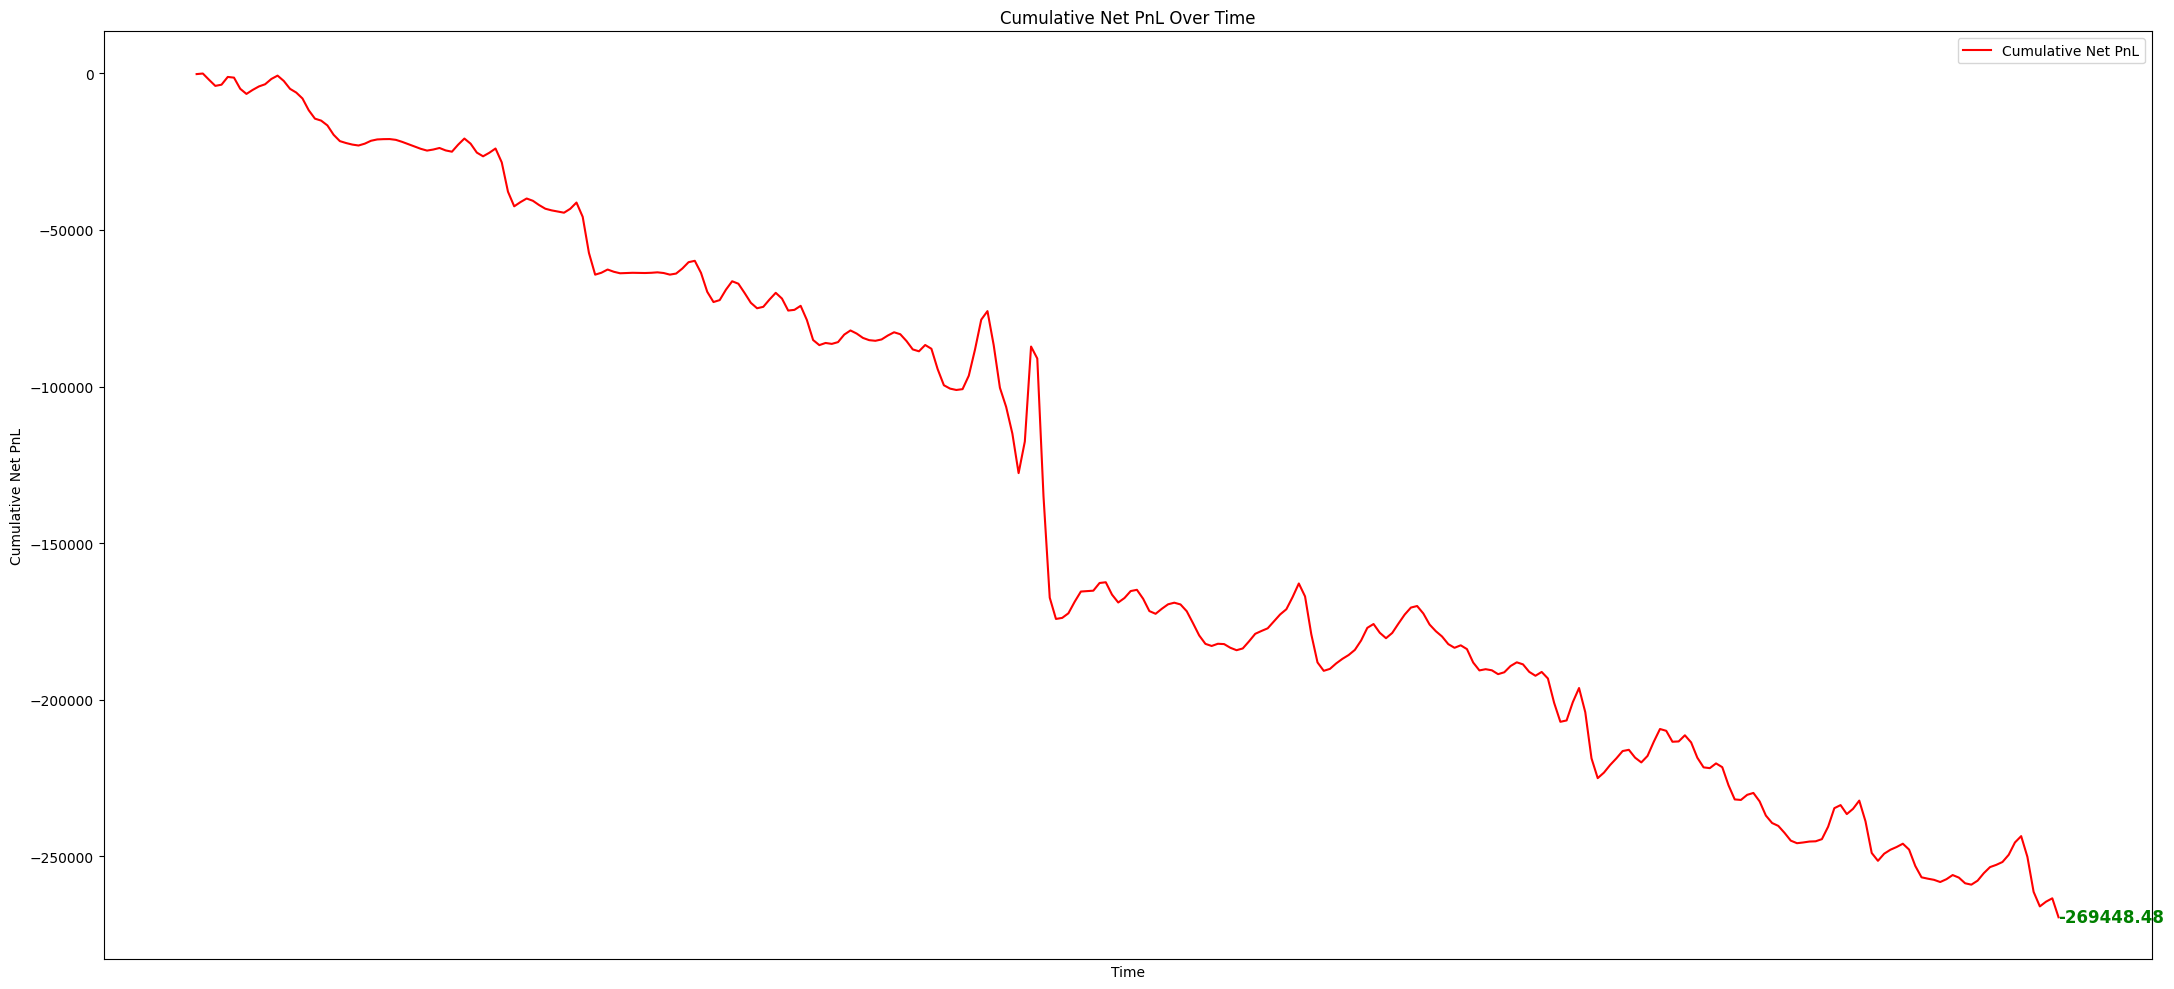

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Assuming new_df_m is already created
x = new_df_m['Unique Date']
y = new_df_m['Cumulative Net PnL']

# Convert dates to numeric for interpolation
x_numeric = np.arange(len(x))
x_new = np.linspace(x_numeric.min(), x_numeric.max(), 300)  # 300 points for smoother curve

# Apply cubic spline interpolation
spline = make_interp_spline(x_numeric, y, k=3)  # k=3 for cubic spline
y_smooth = spline(x_new)

# Determine color based on the trend of the smoothed data
color = 'green' if y_smooth[-1] > y_smooth[0] else 'red'

# Plotting the smooth curve without markers and gridlines
plt.figure(figsize=(22, 10))
plt.plot(x_new, y_smooth, color=color, label='Cumulative Net PnL')

plt.title('Cumulative Net PnL Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Net PnL')

# Add data label at the end of the line
end_x = x_new[-1]
end_y = y_smooth[-1]

plt.text(
    end_x, end_y, f'{end_y:.2f}',
    color='green', fontweight='bold',
    fontsize=12, va='center', ha='left'  # Align label to the left of the end point
)

# Remove or simplify x-axis ticks
plt.xticks([])  # No x-axis labels, or use plt.xticks(x_numeric, []) to keep empty ticks

plt.legend()
plt.tight_layout()  # Adjust layout for better fit
plt.show()

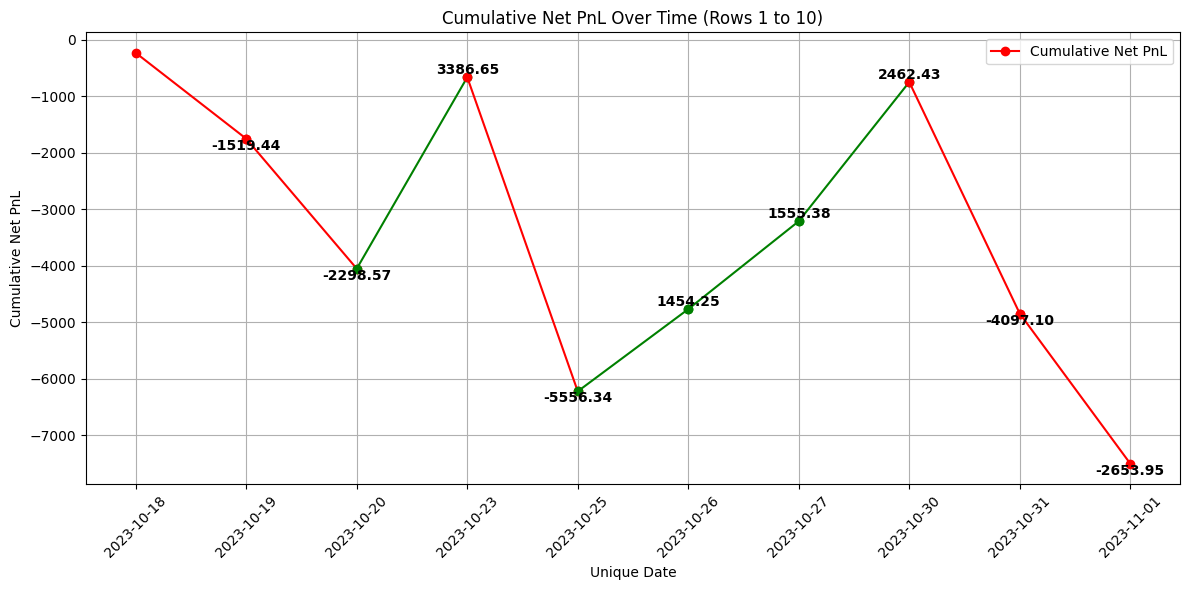

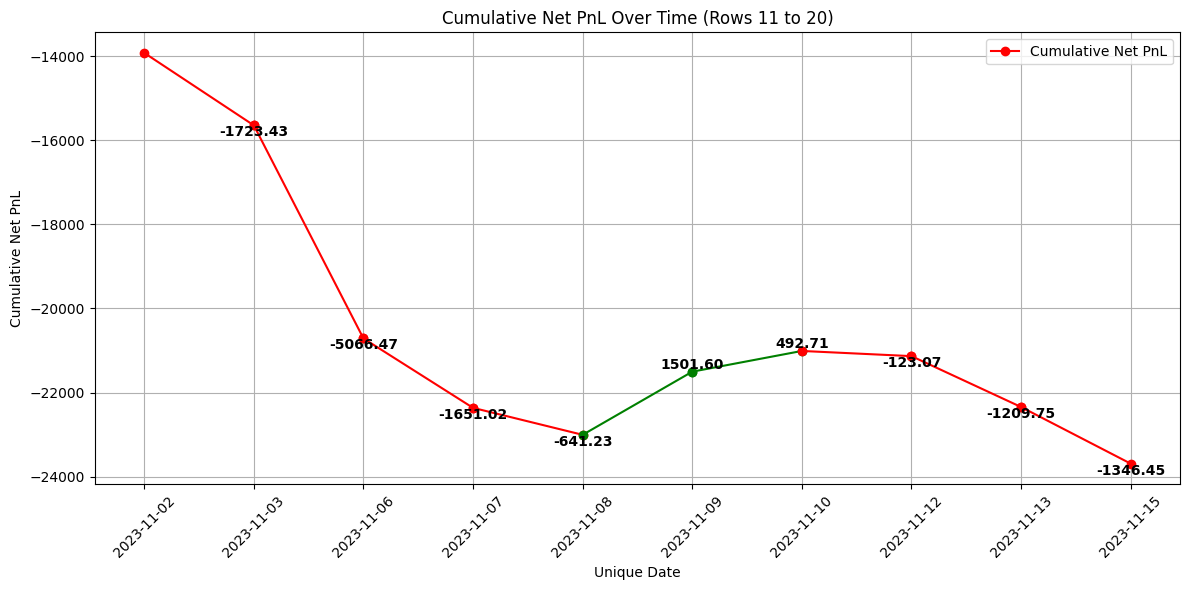

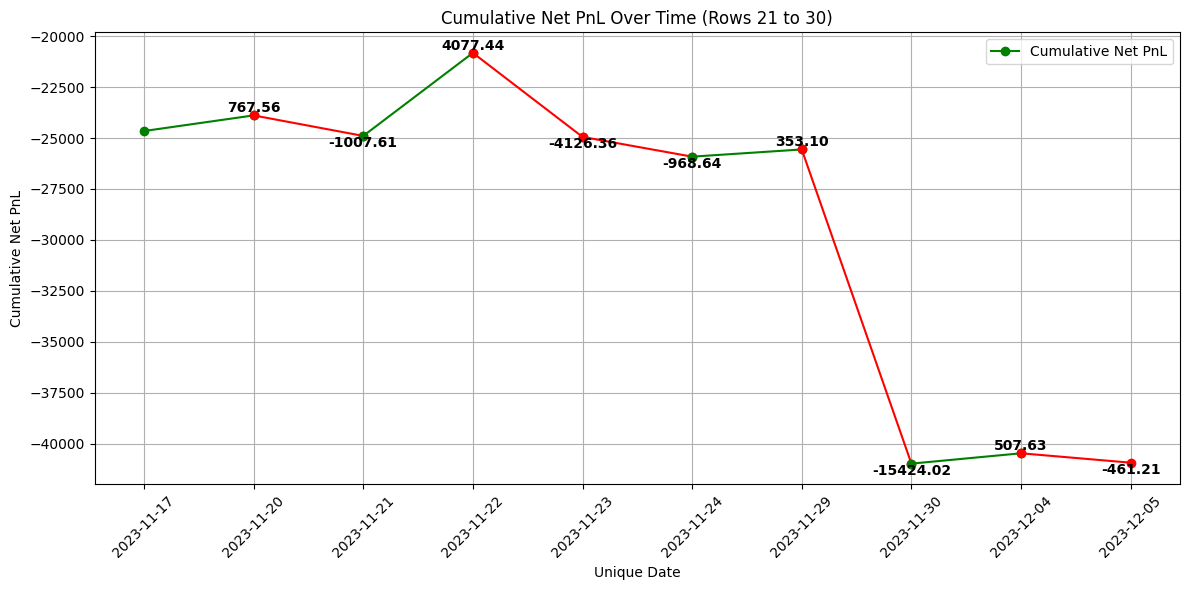

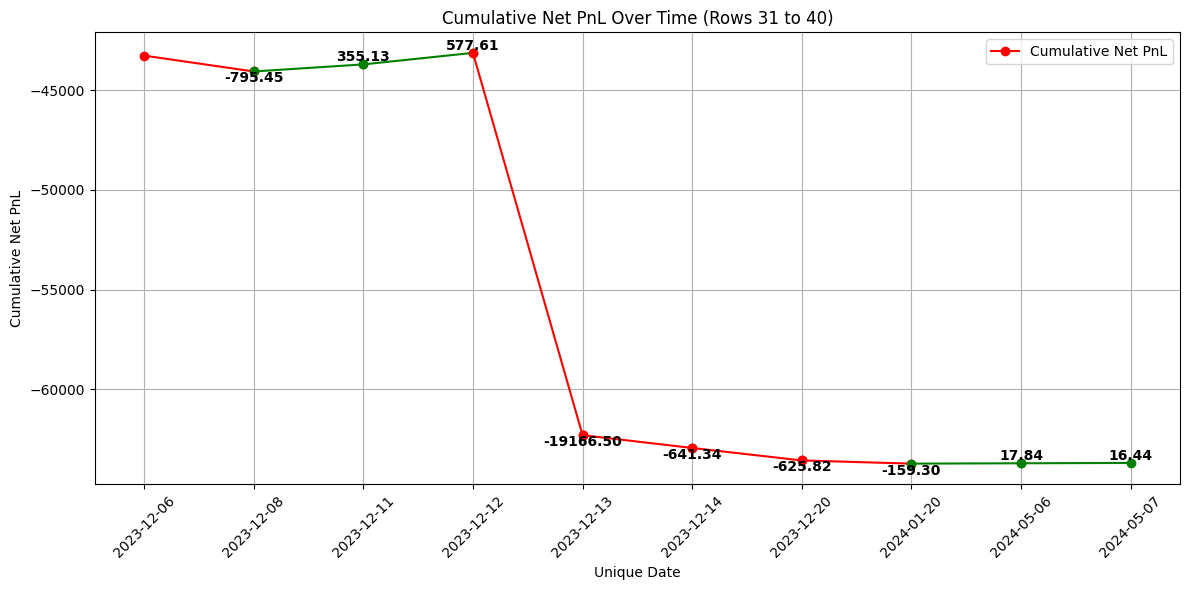

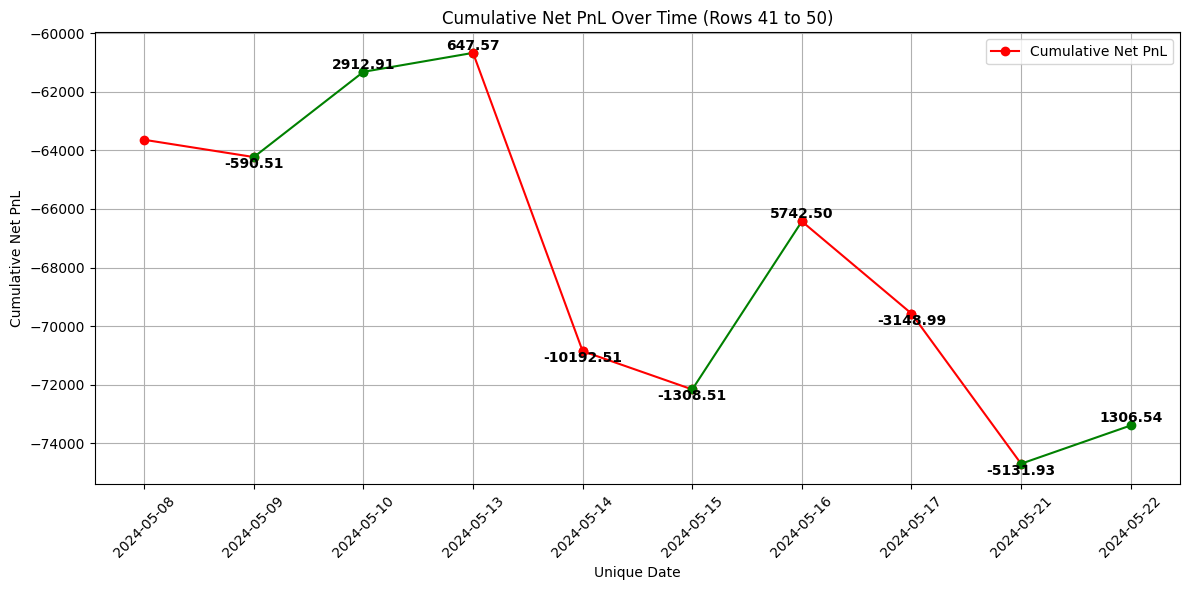

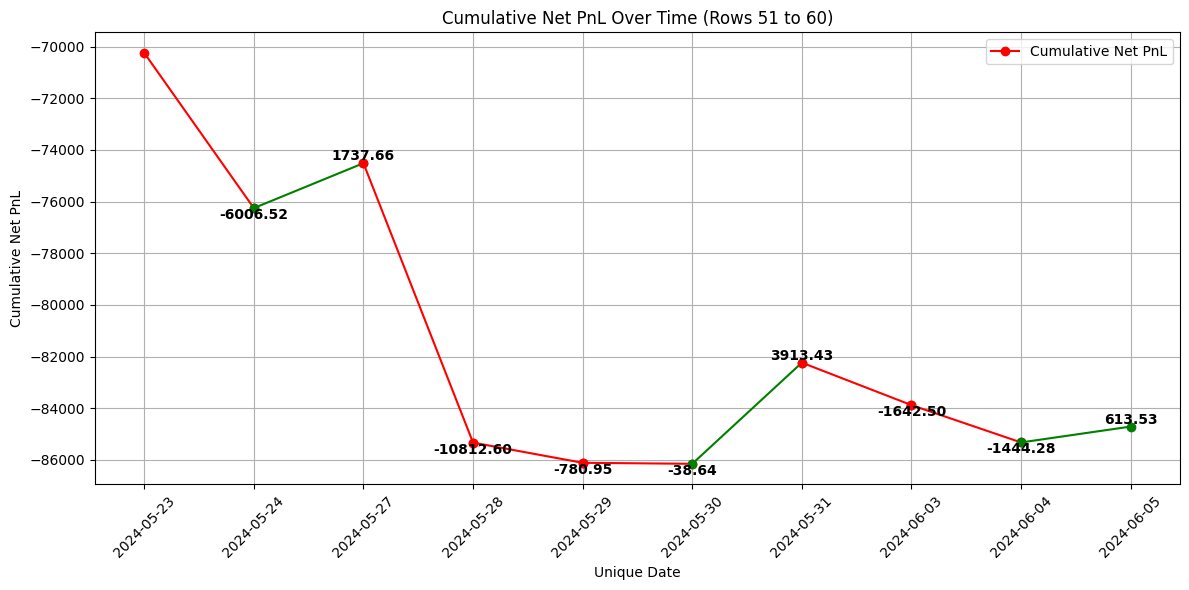

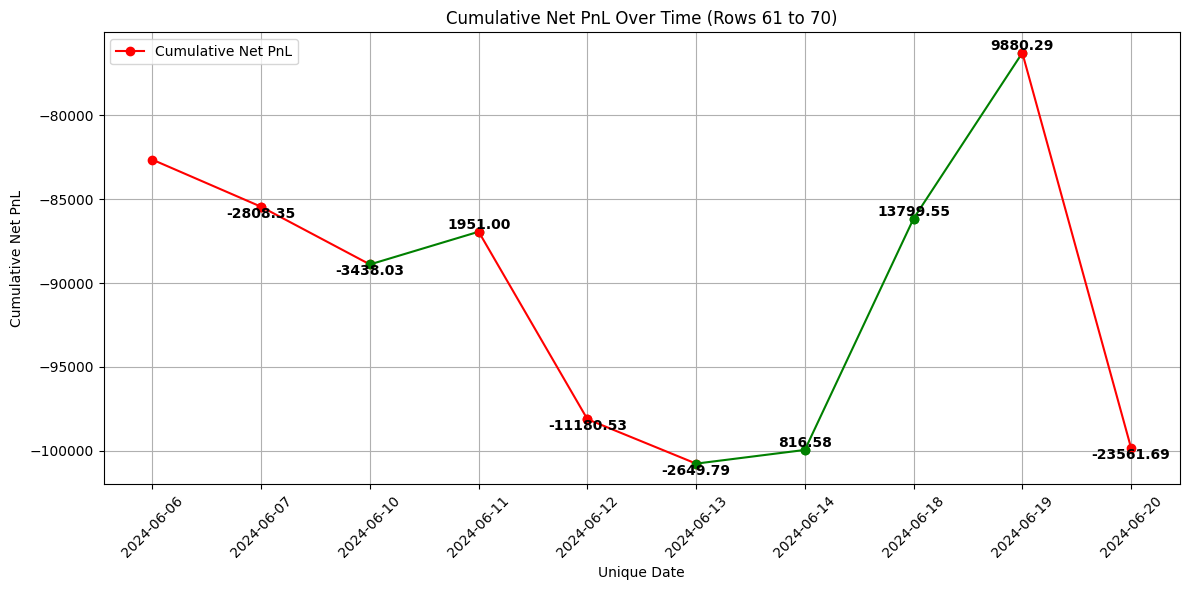

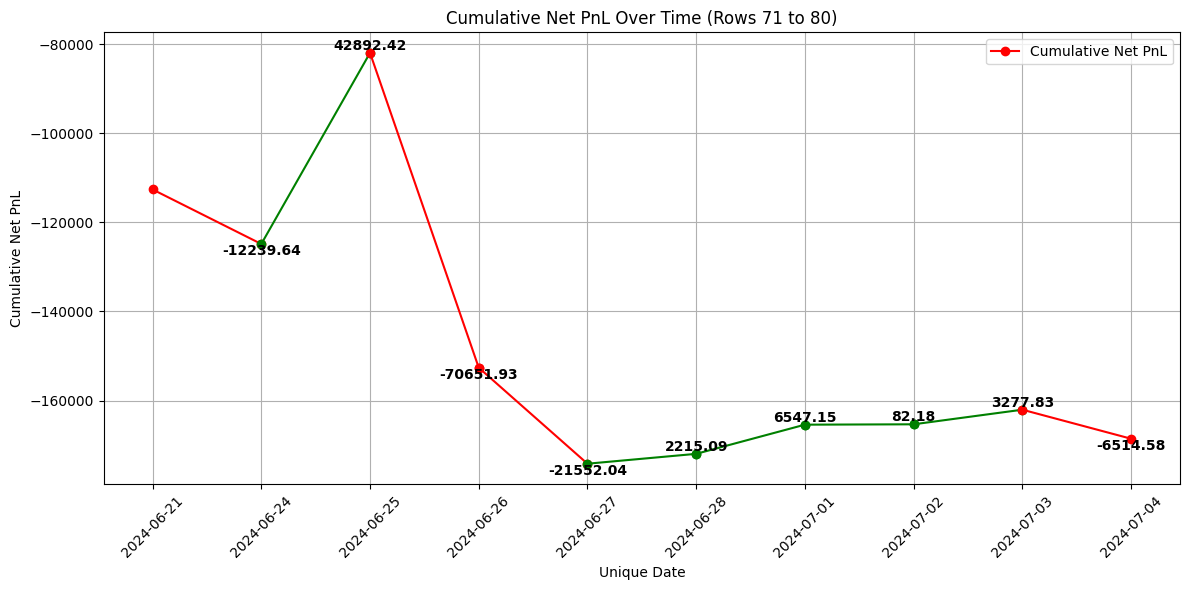

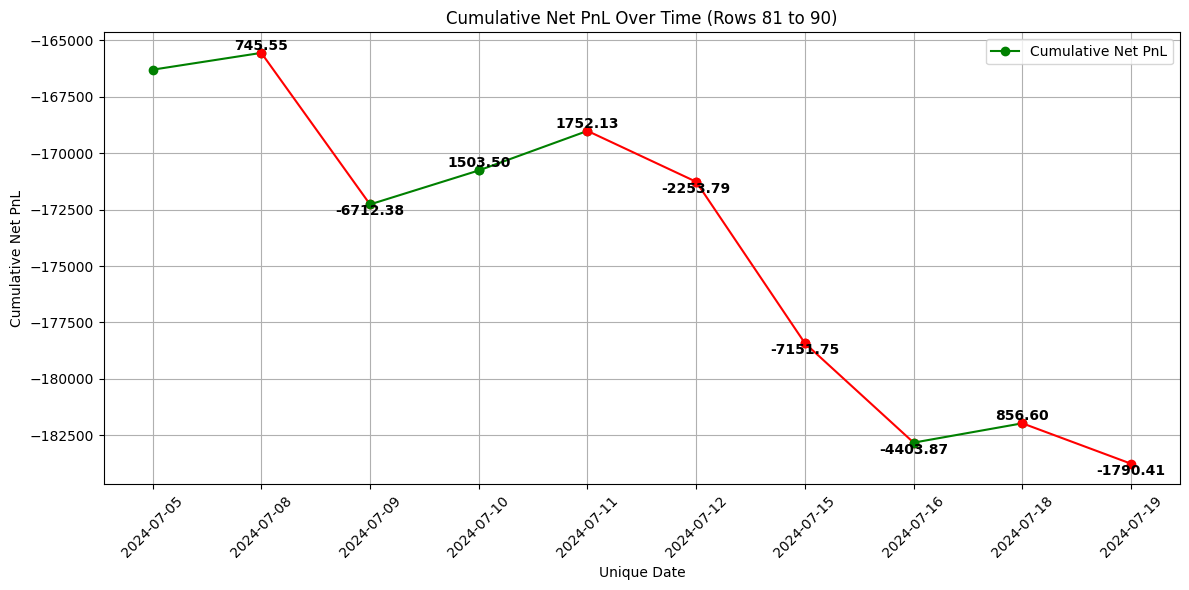

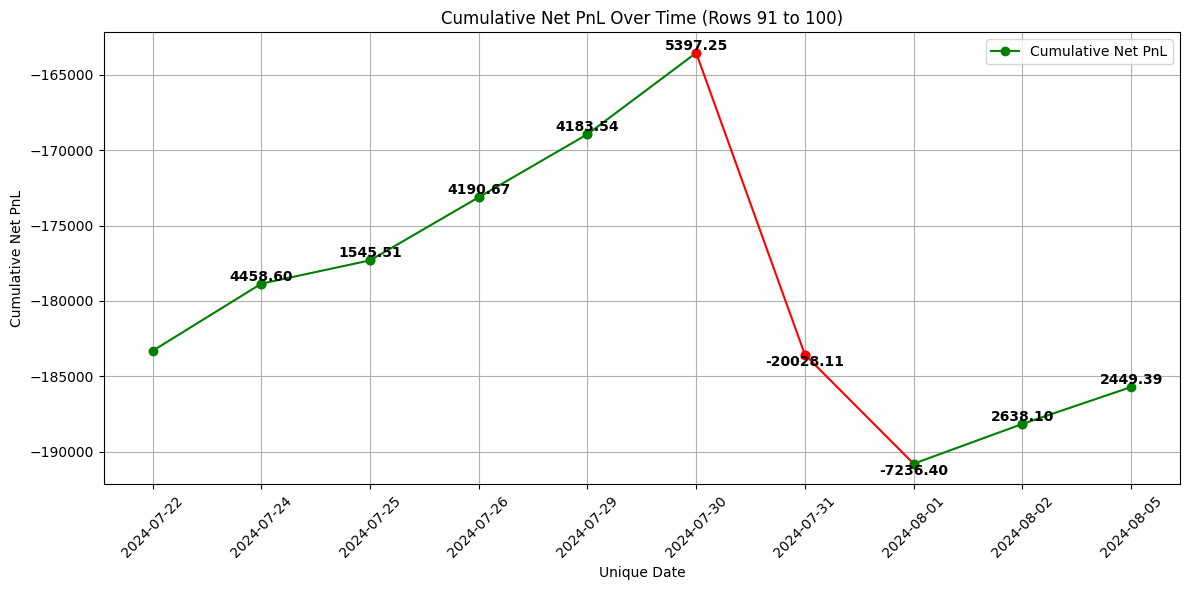

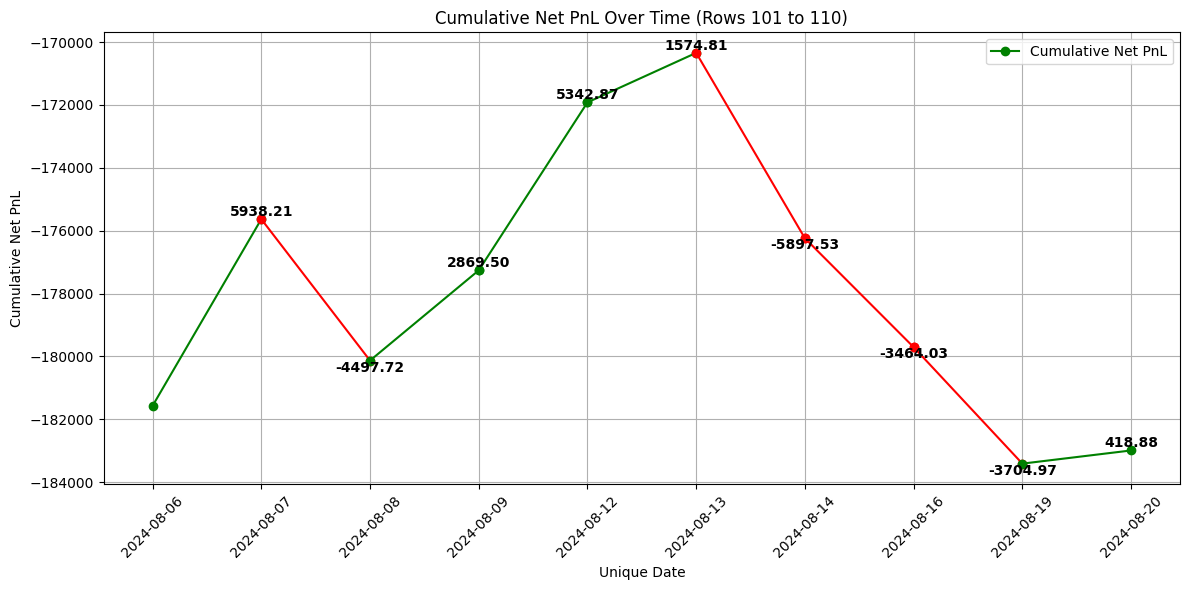

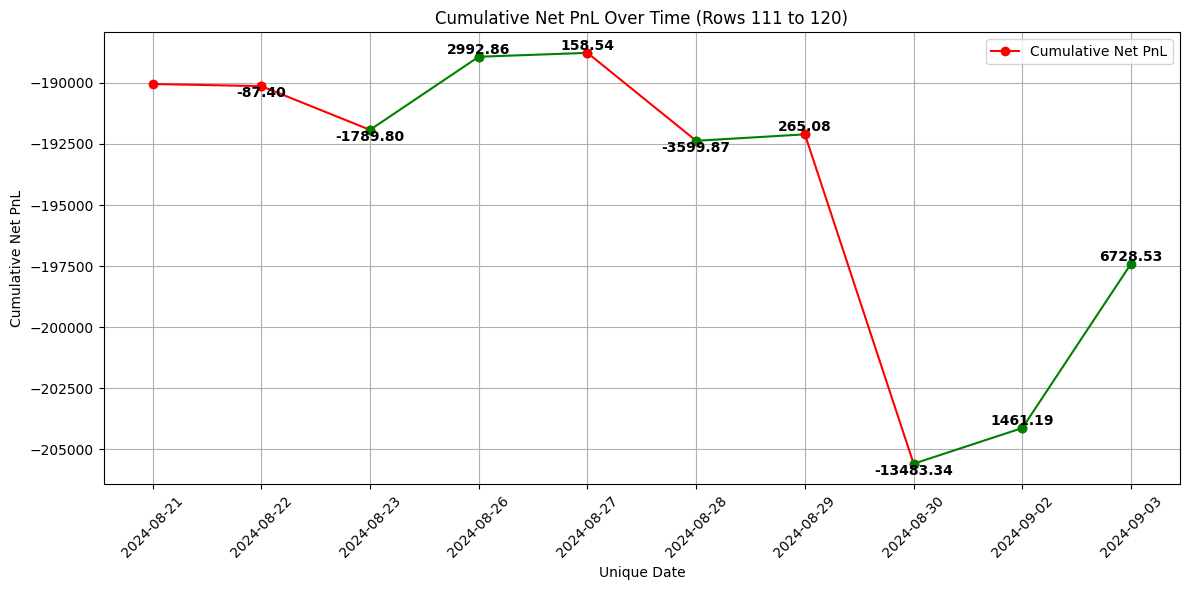

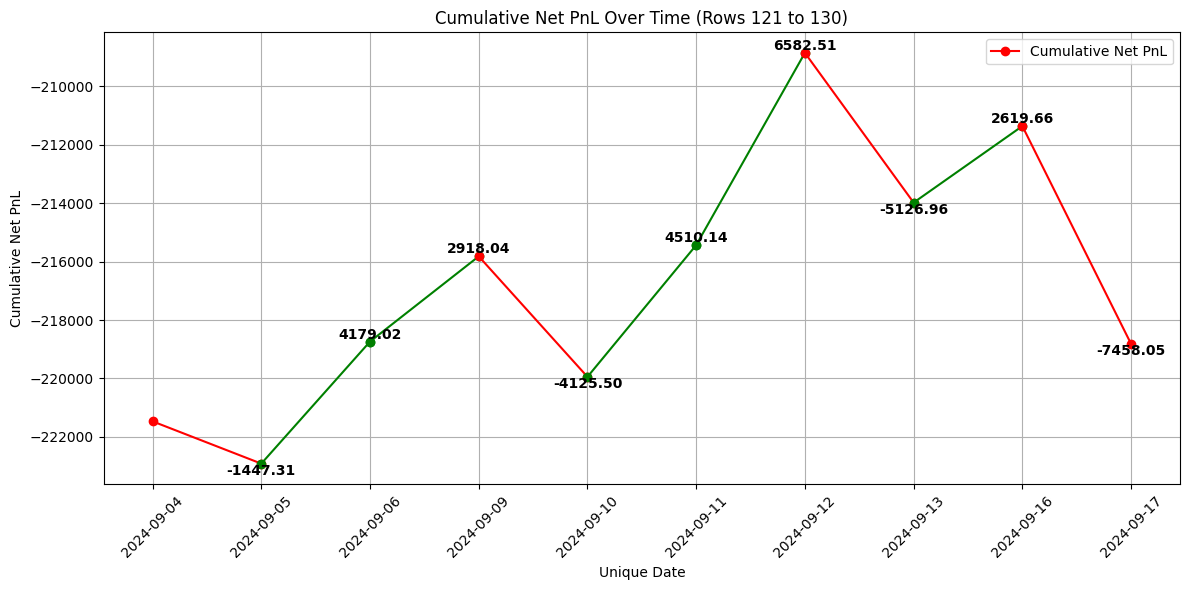

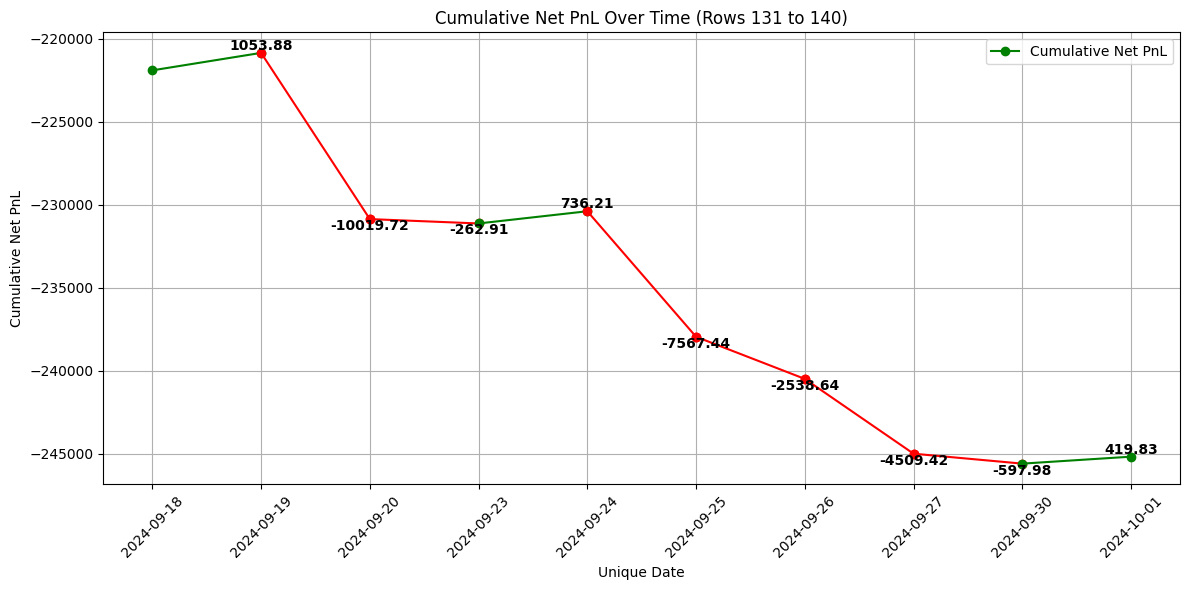

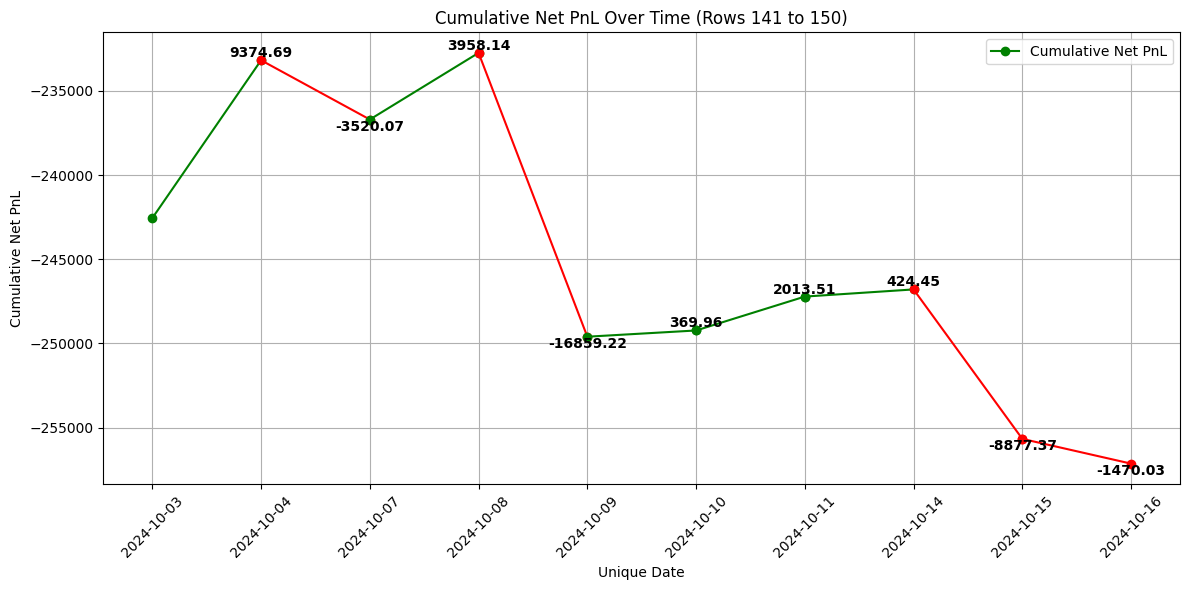

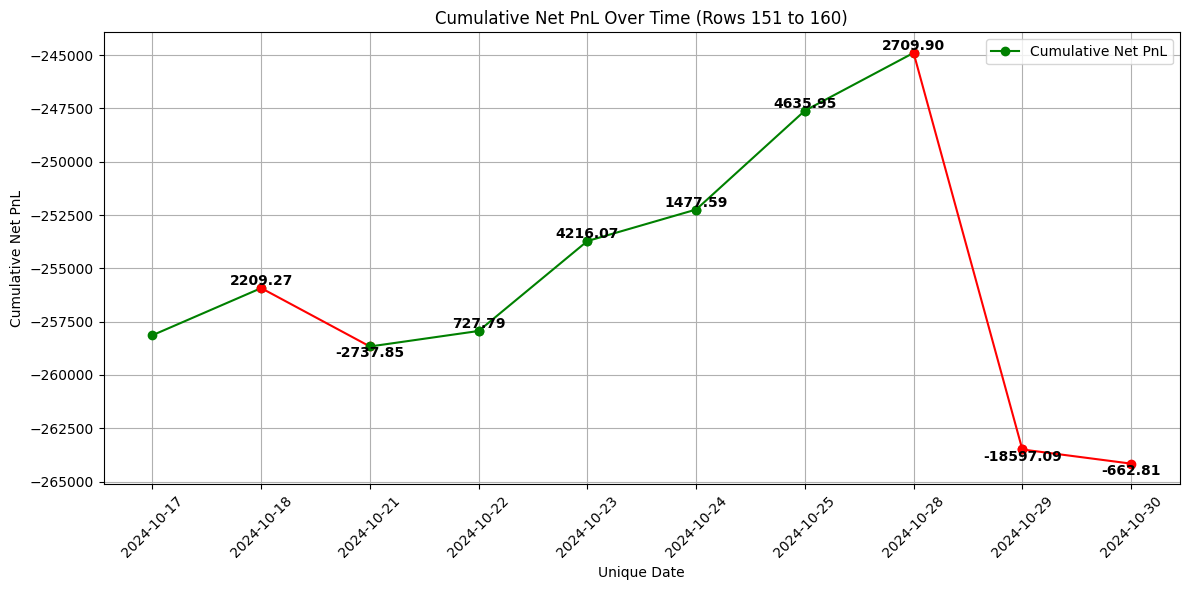

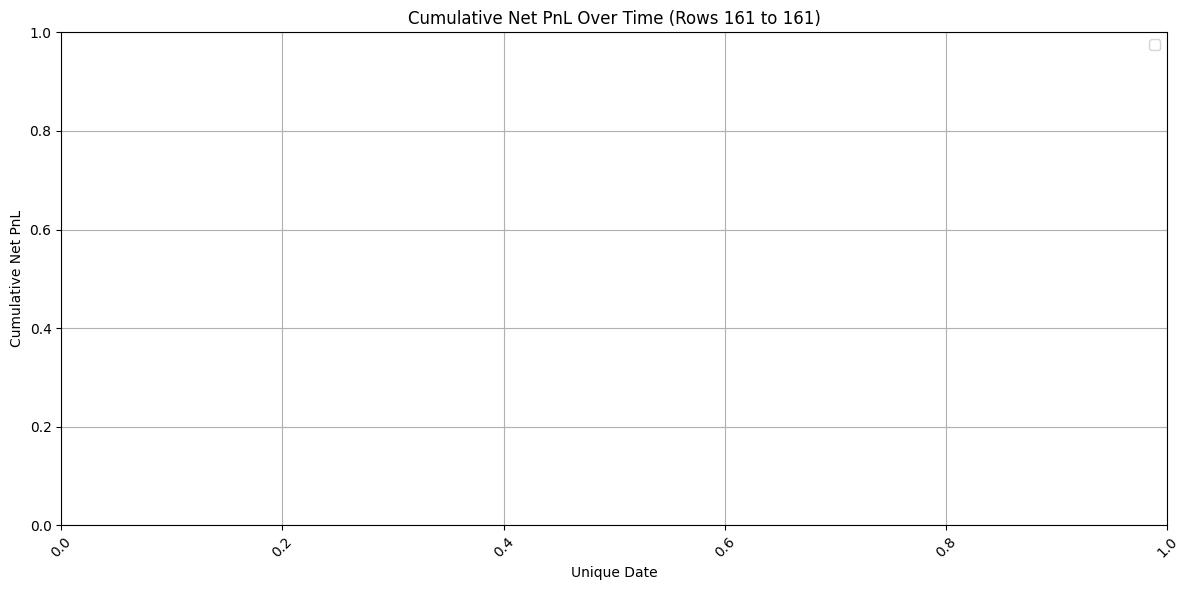

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming new_df_m is already created and contains the necessary data
total_rows = len(new_df_m)
chunk_size = 10

# Loop through the DataFrame in chunks of 10 rows
for start in range(0, total_rows, chunk_size):
    end = start + chunk_size
    data_to_plot = new_df_m.iloc[start:end]

    plt.figure(figsize=(12, 6))

    # Calculate differences to determine the line color
    changes = np.sign(np.diff(data_to_plot['Cumulative Net PnL']))

    # Plot each segment with the appropriate color
    for i in range(len(changes)):
        color = 'green' if changes[i] > 0 else 'red'
        plt.plot(data_to_plot['Unique Date'].iloc[i:i+2],
                 data_to_plot['Cumulative Net PnL'].iloc[i:i+2],
                 marker='o', color=color)

    # Calculate differences from the last point to the next point
    differences = np.diff(data_to_plot['Cumulative Net PnL'])

    # Annotate each point with the difference from the last point
    for i in range(1, len(data_to_plot)):  # Start from 1 to access the previous point
        diff = differences[i - 1]
        annotation_y = data_to_plot['Cumulative Net PnL'].iloc[i] + (0.5 if diff > 0 else -0.5)  # Adjust position based on increase/decrease

        plt.text(data_to_plot['Unique Date'].iloc[i],
                 annotation_y,  # Adjusted position
                 f"{diff:.2f}",  # Display the difference
                 color='black', fontsize=10, fontweight='bold', ha='center', va='bottom' if diff > 0 else 'top')

    plt.title(f'Cumulative Net PnL Over Time (Rows {start + 1} to {min(end, total_rows)})')
    plt.xlabel('Unique Date')
    plt.ylabel('Cumulative Net PnL')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid()
    plt.legend(['Cumulative Net PnL'])
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()


# **My Trades with using 10 % Stoploss Analysis**

**Libraries**

In [24]:
df_10

Trade Date Order Time Trade Time              Security Name  Quantity  \
0     18/10/2023   10:19:36   10:19:36      NIFTY19OCT2023CE19600        50   
1     19/10/2023   10:17:18   10:17:45      NIFTY19OCT2023PE19700        50   
2     19/10/2023   10:59:30   11:03:18      NIFTY19OCT2023PE19700        50   
3     20/10/2023   10:31:13   10:31:13      NIFTY26OCT2023PE19700        50   
4     20/10/2023   11:38:08   11:38:29      NIFTY26OCT2023CE19300        50   
...          ...        ...        ...                        ...       ...   
1743  31/10/2024   10:26:02   10:26:02  BANKNIFTY06NOV2024CE52300        45   
1744  31/10/2024   10:52:19   10:52:19  BANKNIFTY06NOV2024PE51500        30   
1745  31/10/2024   12:08:52   12:10:58  BANKNIFTY06NOV2024CE52100        30   
1746  31/10/2024   12:21:49   12:21:49      NIFTY31OCT2024PE24250        25   
1747  31/10/2024   12:25:19   12:25:19      NIFTY31OCT2024PE24200       500   

      Buy rate  Sell rate  
0       238.75     234.55  
1       113.00      98.00  
2       120.00     105.05  
3       187.85     176.05  
4       274.00     256.15  
...        ...        ...  
1743    348.80     326.45  
1744    363.75     360.15  
1745    350.00     329.70  
1746     40.50      38.60  
1747     15.80      14.85  

[1748 rows x 7 columns]

In [25]:
df_10.columns

Index(['Trade Date', 'Order Time', 'Trade Time', 'Security Name', 'Quantity',
       'Buy rate', 'Sell rate'],
      dtype='object')

In [26]:
# Calculate Buy Value, Sell Value, and PnL
df_10['Buy Value'] = df_10['Quantity'] * df_10['Buy rate']
df_10['Sell Value'] = df_10['Quantity'] * df_10['Sell rate']
df_10['PnL'] = df_10['Sell Value'] - df_10['Buy Value']

# Limit the loss to 10% of Buy Value
max_loss_limit = df_10['Buy Value'] * 0.10  # 10% of Buy Value

# Adjust Sell Value and PnL where the loss exceeds the 10% limit
df_10.loc[df_10['PnL'] < -max_loss_limit, 'Sell Value'] = df_10['Buy Value'] * 0.90
df_10.loc[df_10['PnL'] < -max_loss_limit, 'PnL'] = df_10['Sell Value'] - df_10['Buy Value']

In [27]:
# Calculate Charges for each transaction with 2 decimal places
df_10['Charges'] = round(
    brokerage +
    (transaction_charges_pct / 100) * (df_10['Buy Value'] + df_10['Sell Value']) +
    (stt_pct / 100) * df_10['Sell Value'] +
    (ipft_pct / 100) * (df_10['Buy Value'] + df_10['Sell Value']) +
    (stamp_duty_pct / 100) * (df_10['Buy Value'] + df_10['Sell Value']) +
    (sebi_charges_pct / 100) * (df_10['Buy Value'] + df_10['Sell Value']) +
    gst_pct * (
        brokerage +
        (transaction_charges_pct / 100) * (df_10['Buy Value'] + df_10['Sell Value']) +
        (stt_pct / 100) * df_10['Sell Value'] +
        (ipft_pct / 100) * (df_10['Buy Value'] + df_10['Sell Value']) +
        (stamp_duty_pct / 100) * (df_10['Buy Value'] + df_10['Sell Value']) +
        (sebi_charges_pct / 100) * (df_10['Buy Value'] + df_10['Sell Value'])
    ), 2
)

In [28]:
# Calculate Net PnL
df_10['Net PnL'] = df_10['PnL'] - df_10['Charges']  # Start by assuming PnL is positive

# Adjust Net PnL if PnL is negative
df_10.loc[df_10['PnL'] < 0, 'Net PnL'] = df_10['PnL'] + (-df_10['Charges'])

# Round Net PnL to 2 decimal places
df_10['Net PnL'] = df_10['Net PnL'].round(2)


In [29]:
# Calculate Cumulative Net PnL
df_10['Cumulative Net PnL'] = df_10['Net PnL'].cumsum()


In [30]:
import pandas as pd

df_10['Trade Date'] = pd.to_datetime(df_10['Trade Date'])

# Group by 'Trade Date' and sum the 'Net PnL' for each unique date
cumulative_net_pnl = df_10.groupby('Trade Date')['Net PnL'].sum().reset_index()

# Calculate the cumulative sum of Net PnL
cumulative_net_pnl['Cumulative Net PnL'] = cumulative_net_pnl['Net PnL'].cumsum()

# Rename the column to 'Unique Date'
cumulative_net_pnl.rename(columns={'Trade Date': 'Unique Date'}, inplace=True)

# Create new_df_10 with only the required columns
new_df_10 = cumulative_net_pnl[['Unique Date', 'Cumulative Net PnL']]

<ipython-input-30-71545c3d65dc>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_10['Trade Date'] = pd.to_datetime(df_10['Trade Date'])


In [31]:
new_df_10

Unique Date  Cumulative Net PnL
0    2023-10-18             -234.64
1    2023-10-19            -1422.13
2    2023-10-20            -3720.70
3    2023-10-23             -334.05
4    2023-10-25            -1639.86
..          ...                 ...
156  2024-10-25           -23248.77
157  2024-10-28           -20538.87
158  2024-10-29           -37452.52
159  2024-10-30           -35441.08
160  2024-10-31           -40732.55

[161 rows x 2 columns]

In [32]:
new_df_10['Unique Date'] = new_df_10['Unique Date'].astype(str)

<ipython-input-32-09d9af3ce84f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_10['Unique Date'] = new_df_10['Unique Date'].astype(str)


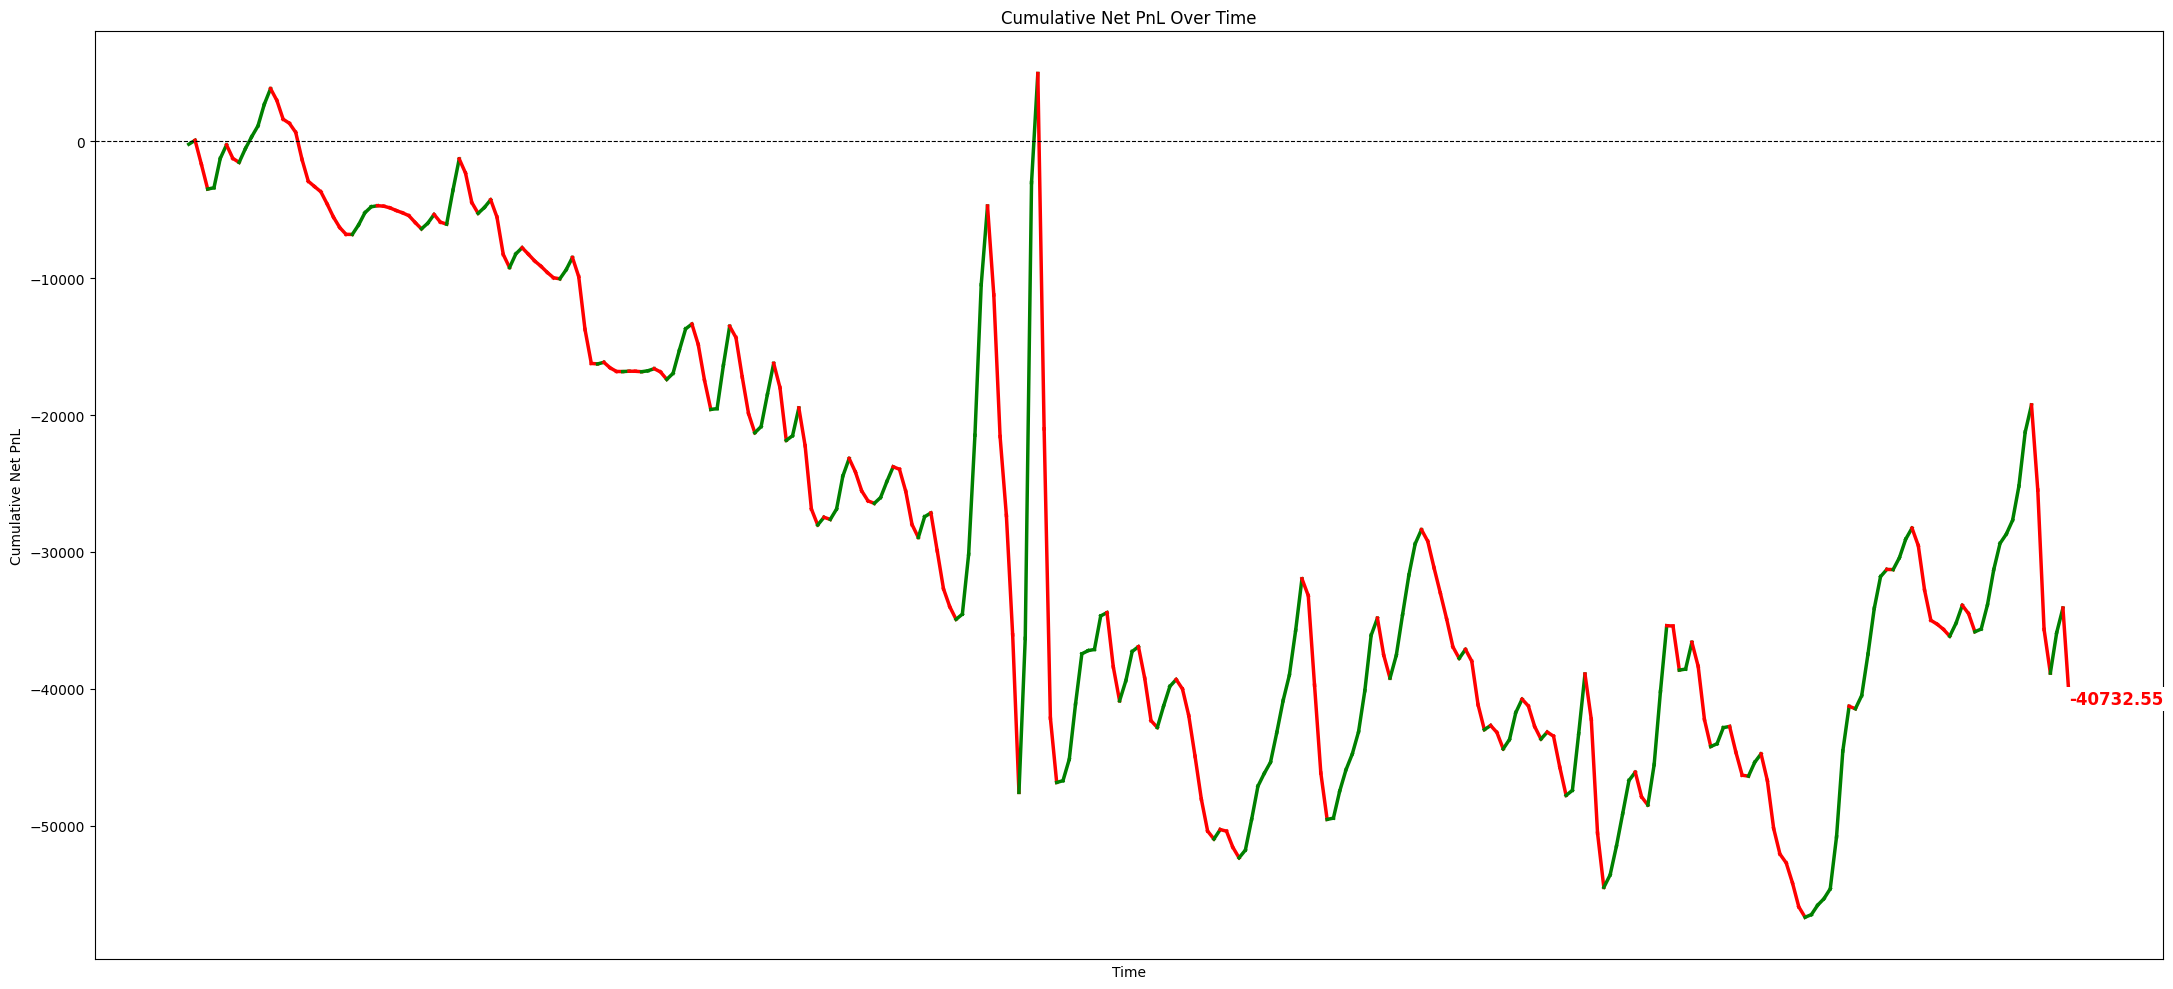

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Assuming new_df_10 is already created
x = new_df_10['Unique Date']
y = new_df_10['Cumulative Net PnL']

# Convert dates to numeric for interpolation
x_numeric = np.arange(len(x))
x_new = np.linspace(x_numeric.min(), x_numeric.max(), 300)  # 300 points for a smoother curve

# Apply cubic spline interpolation
spline = make_interp_spline(x_numeric, y, k=3)  # k=3 for cubic spline
y_smooth = spline(x_new)

# Plotting with dynamic colors based on the slope
plt.figure(figsize=(22, 10))

for i in range(1, len(x_new)):
    # Determine the color based on the slope (up = green, down = red)
    color = 'g' if y_smooth[i] > y_smooth[i - 1] else 'r'

    # Plot segment by segment with increased thickness
    plt.plot(x_new[i-1:i+1], y_smooth[i-1:i+1], color=color, linewidth=2.5)

# Draw a thin black horizontal line at y = 0
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')

# Add a data label at the end of the line
end_x = x_new[-1]  # X-coordinate of the last point
end_y = y_smooth[-1]  # Y-coordinate of the last point

plt.text(
    end_x, end_y, f'{end_y:.2f}',
    color='red', fontweight='bold', fontsize=12,
    va='center', ha='left',  # Center-aligned vertically, left-aligned horizontally
    bbox=dict(facecolor='white', edgecolor='none', pad=2)  # Optional: Add a white background for better visibility
)

plt.title('Cumulative Net PnL Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Net PnL')

# Remove or simplify x-axis ticks
plt.xticks([])  # No x-axis labels

plt.tight_layout()  # Adjust layout for better fit
plt.show()

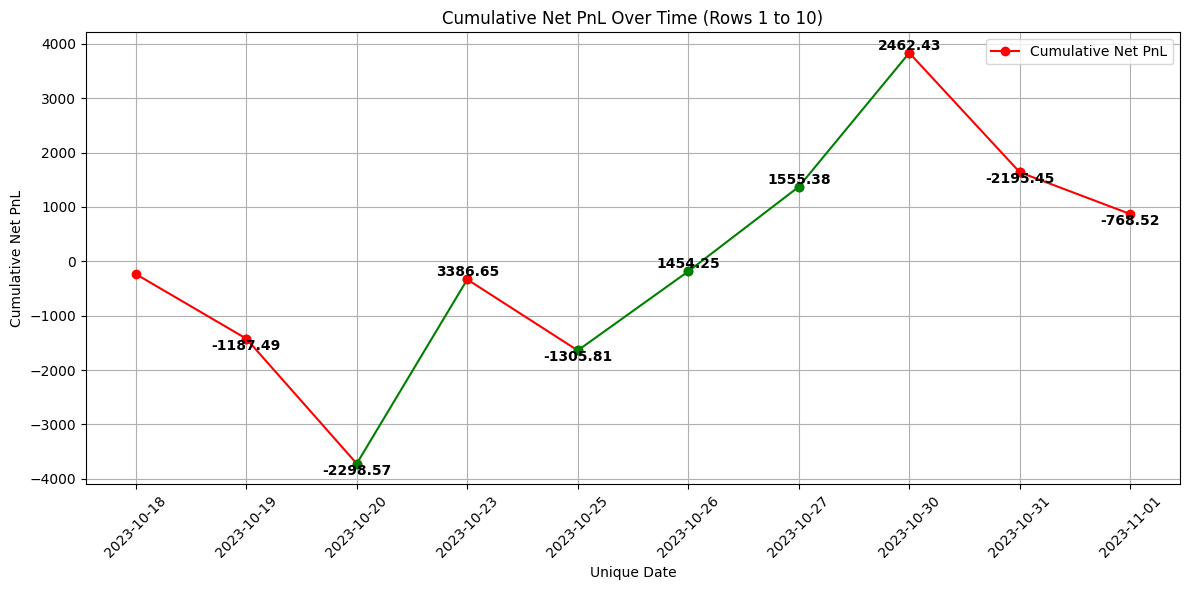

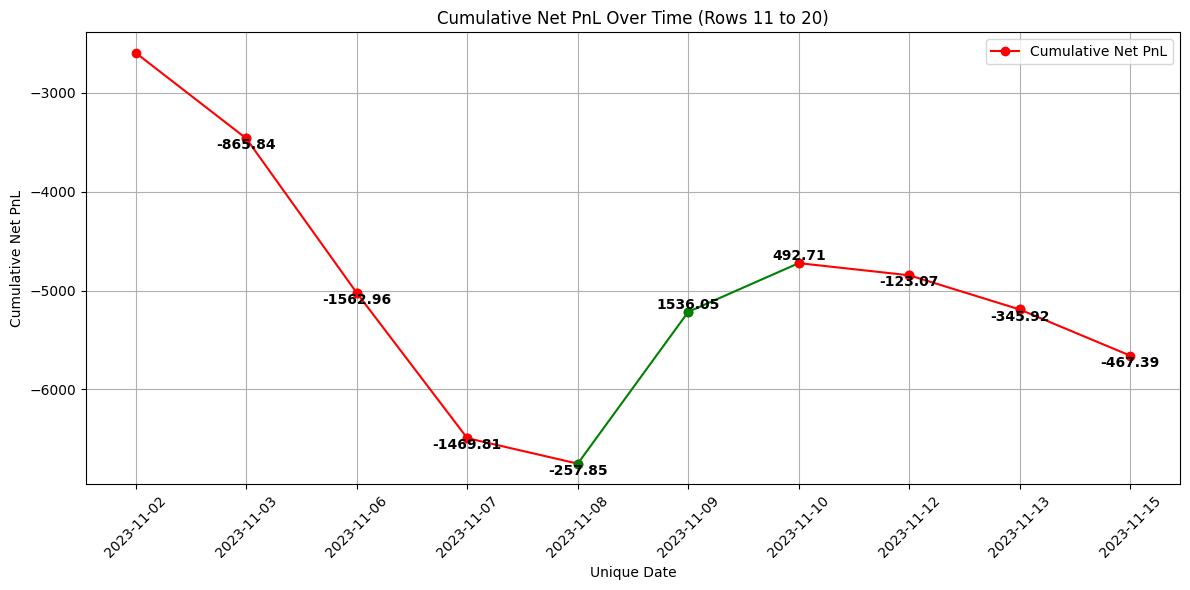

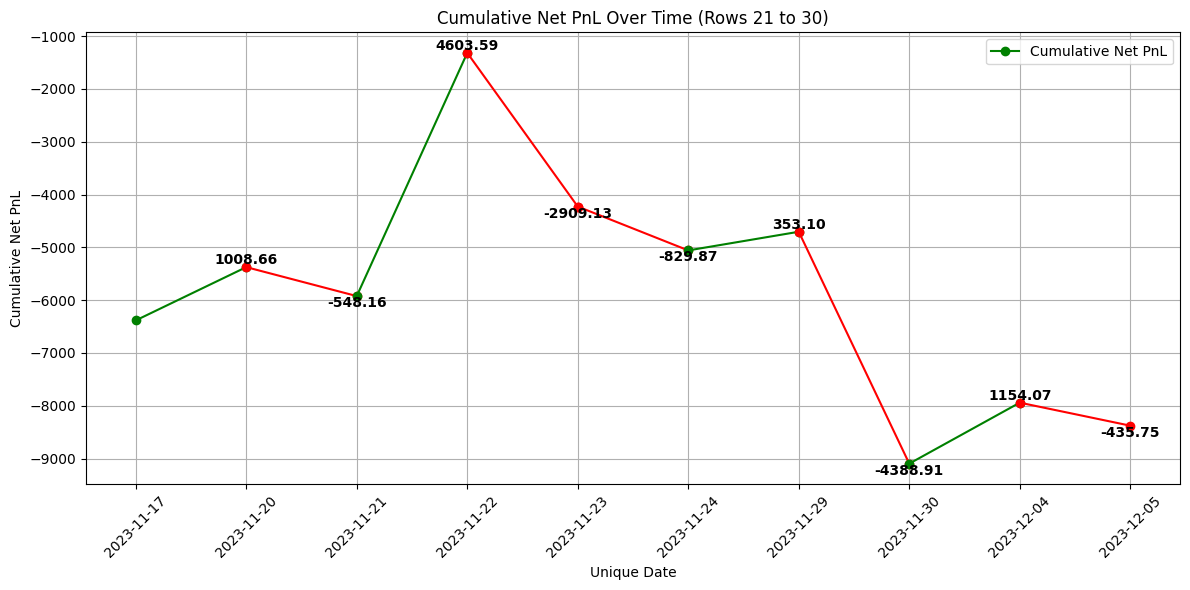

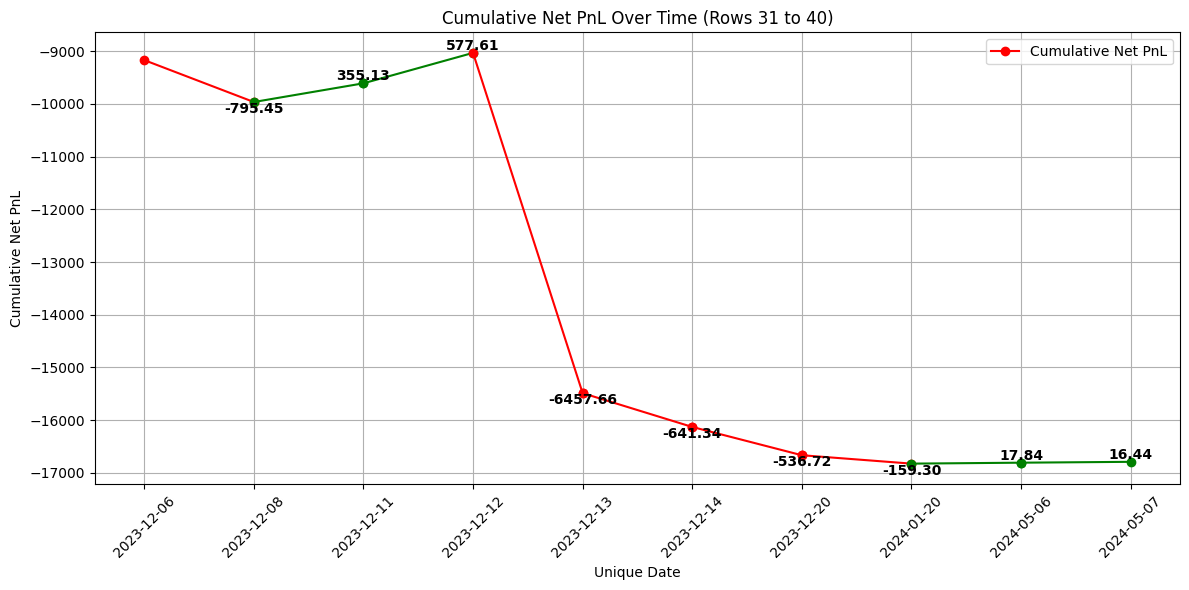

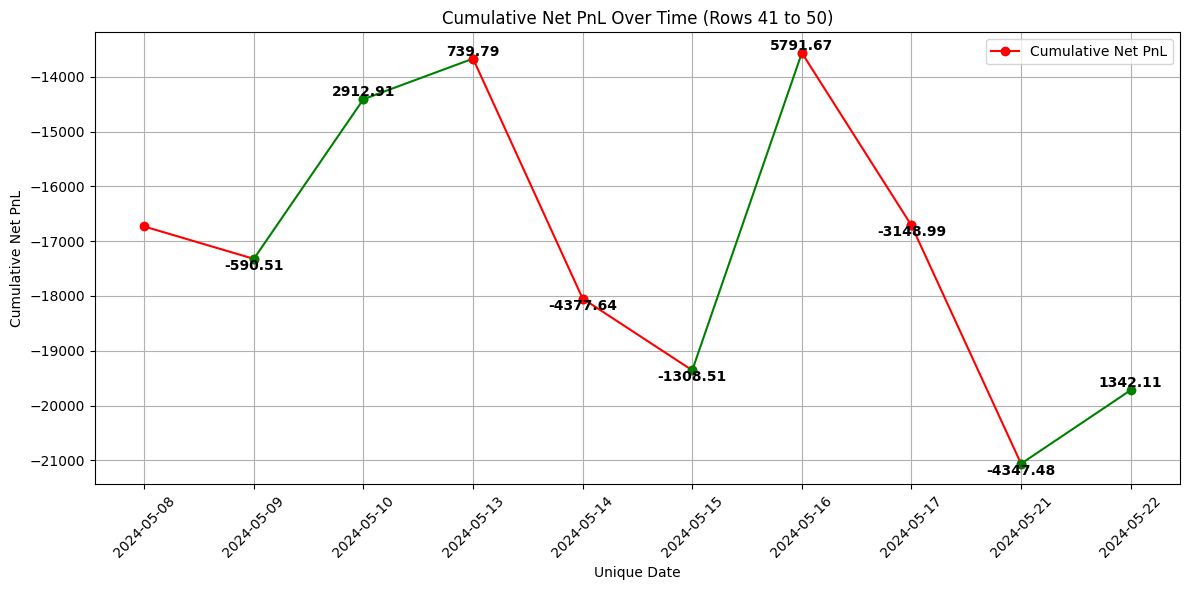

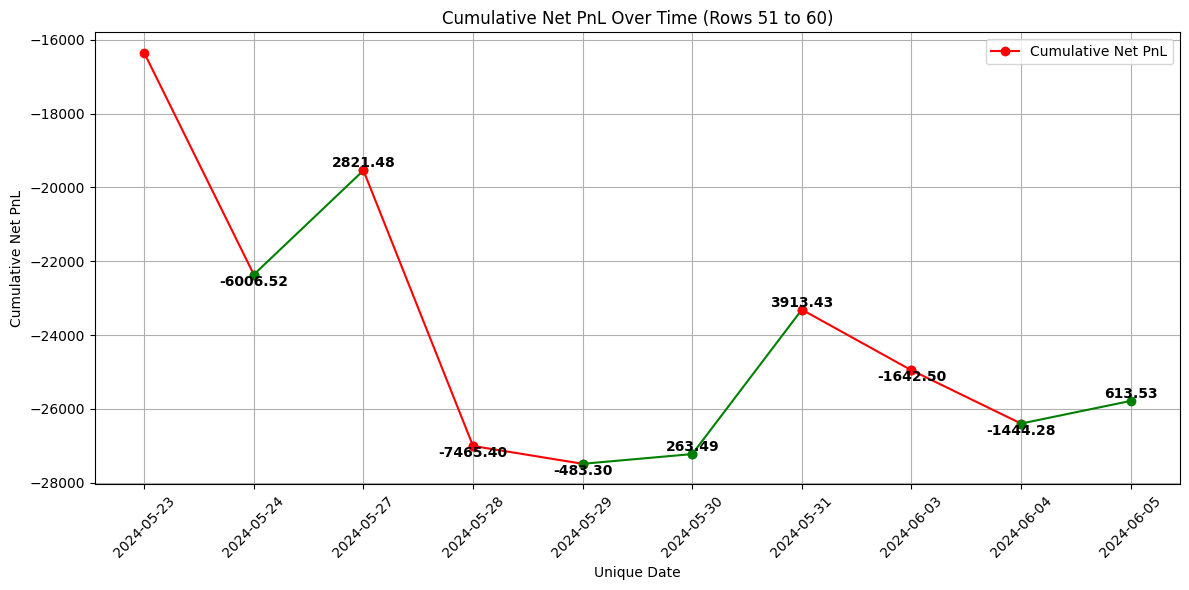

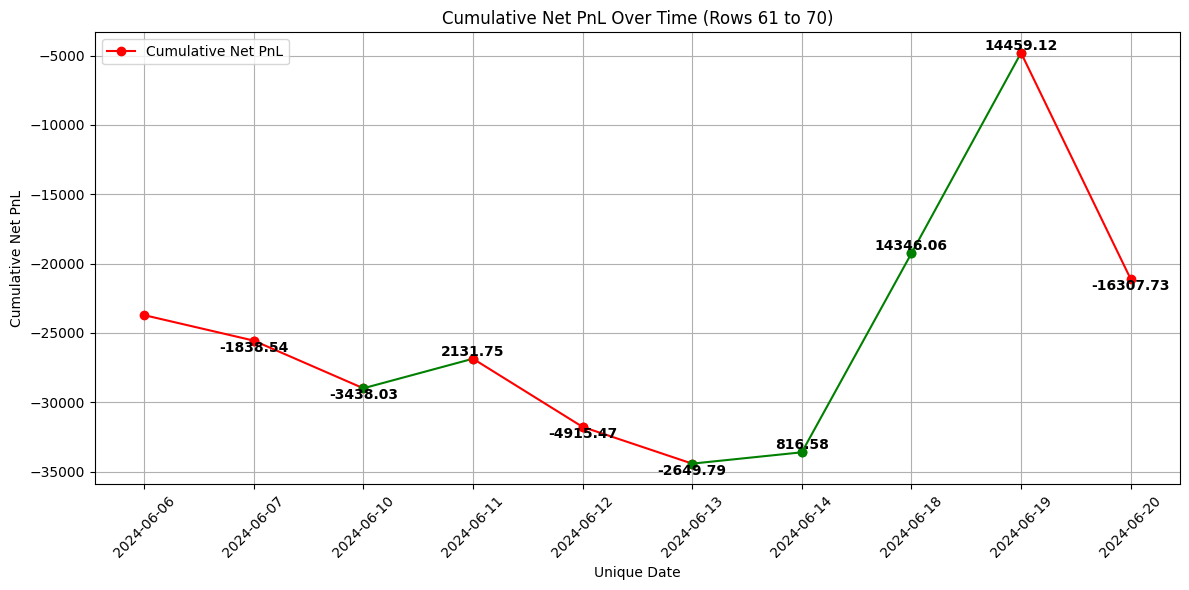

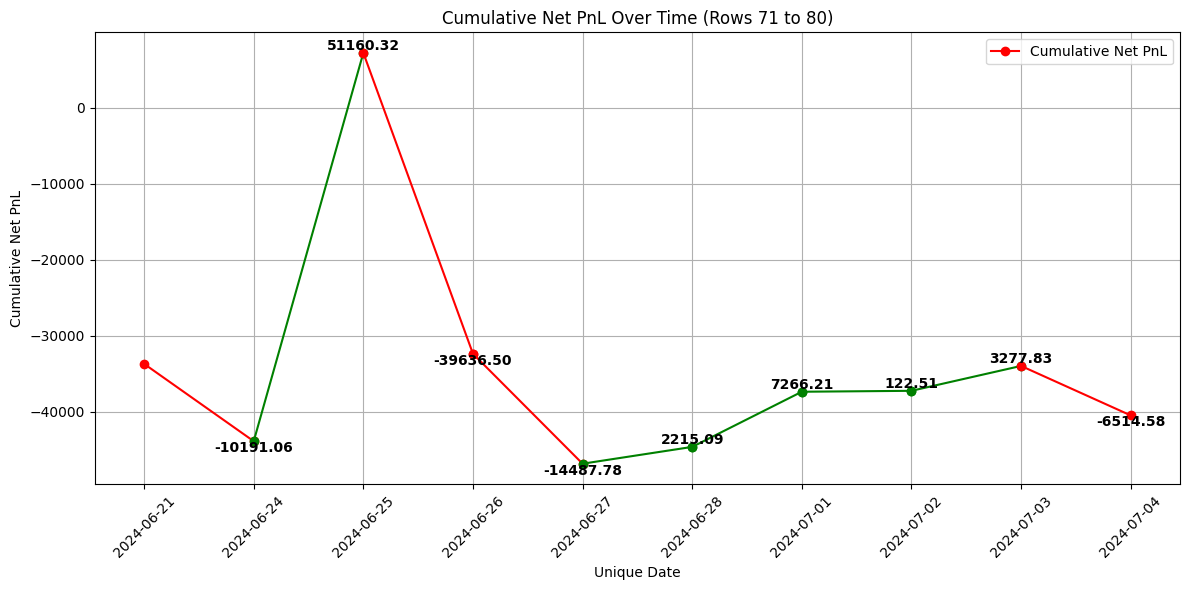

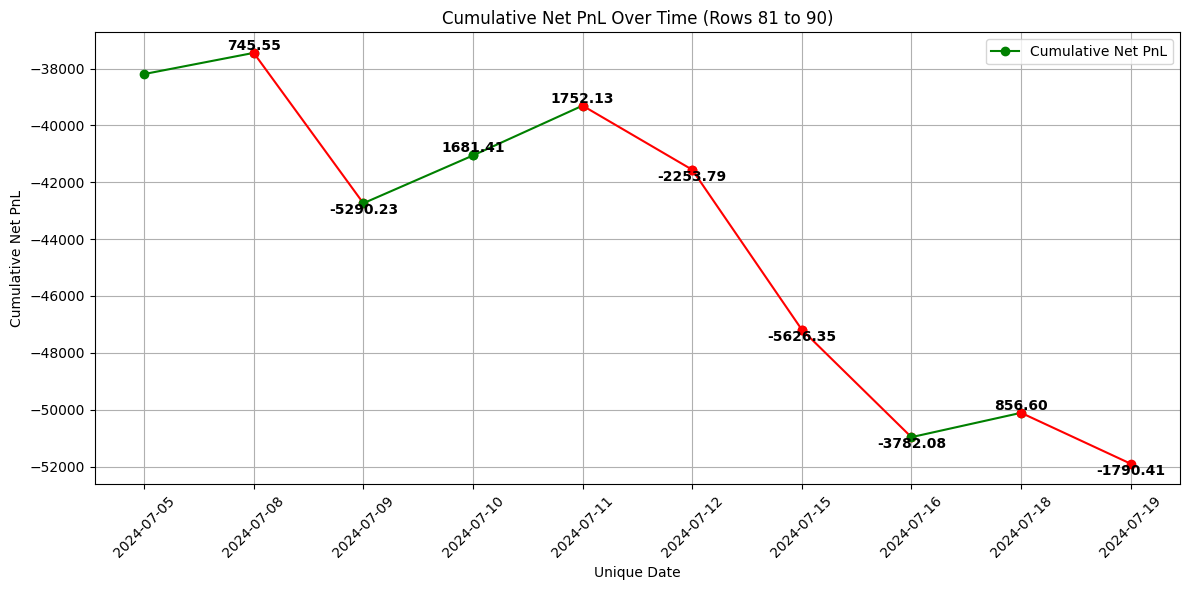

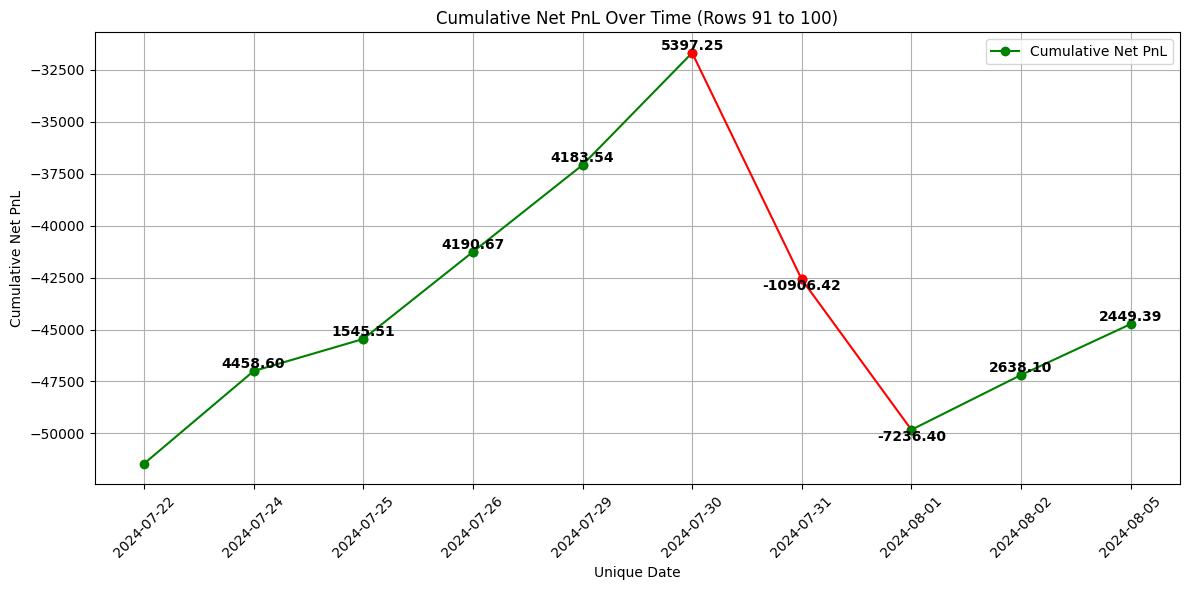

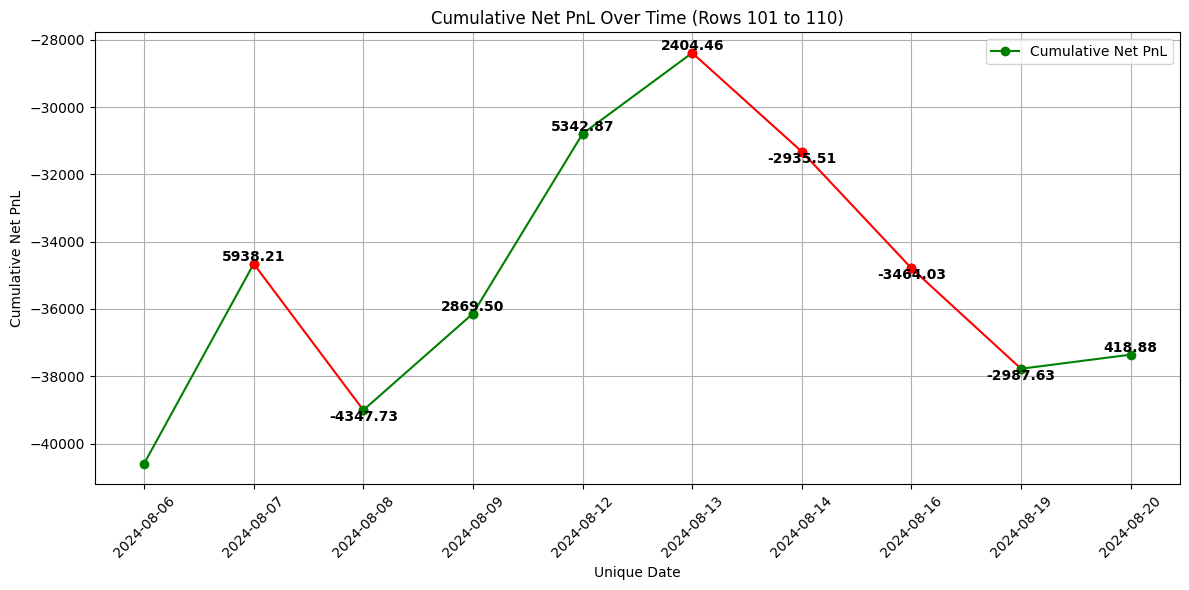

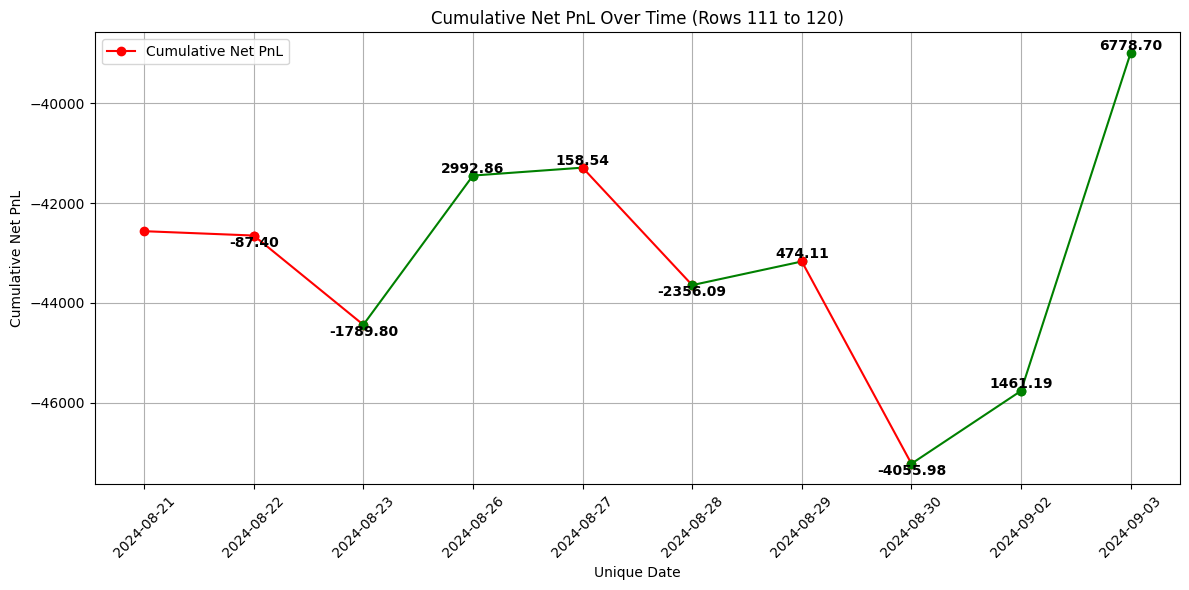

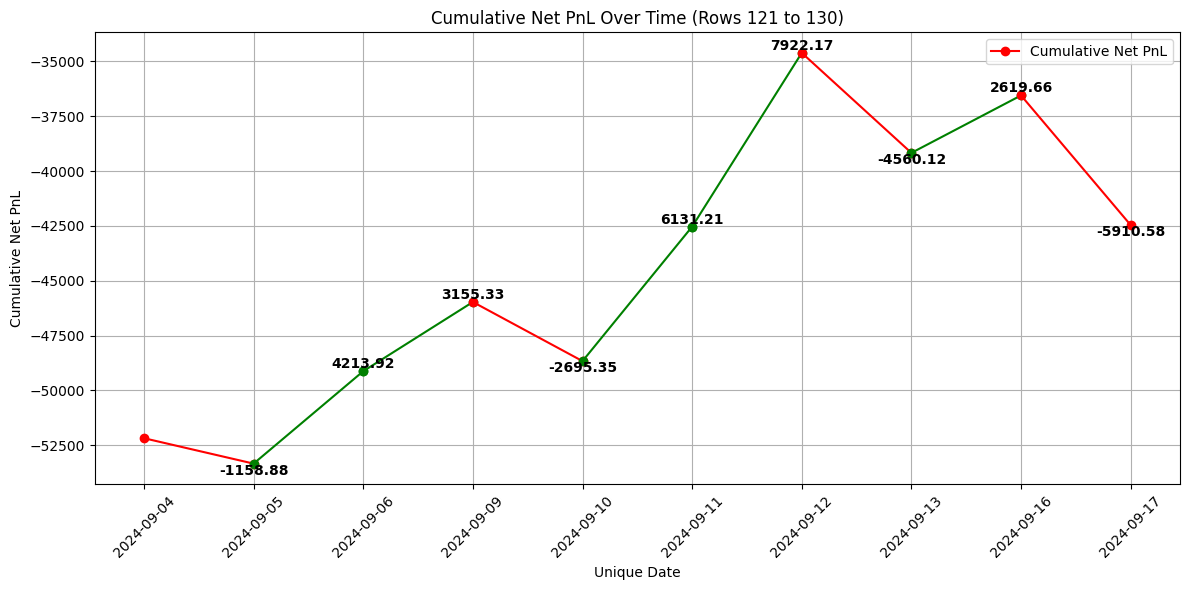

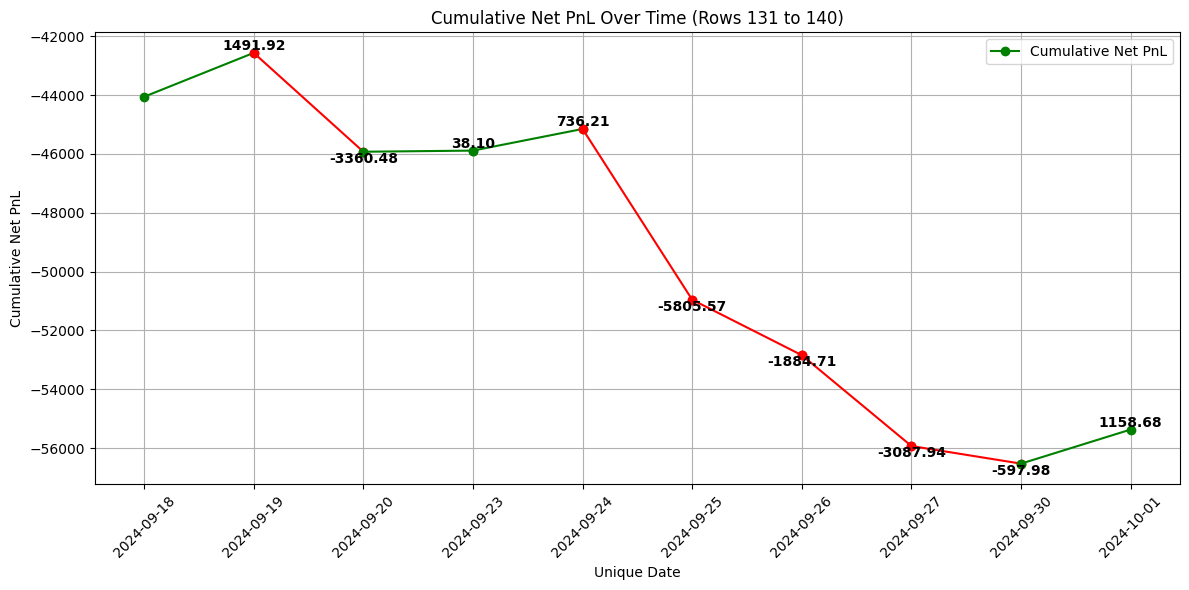

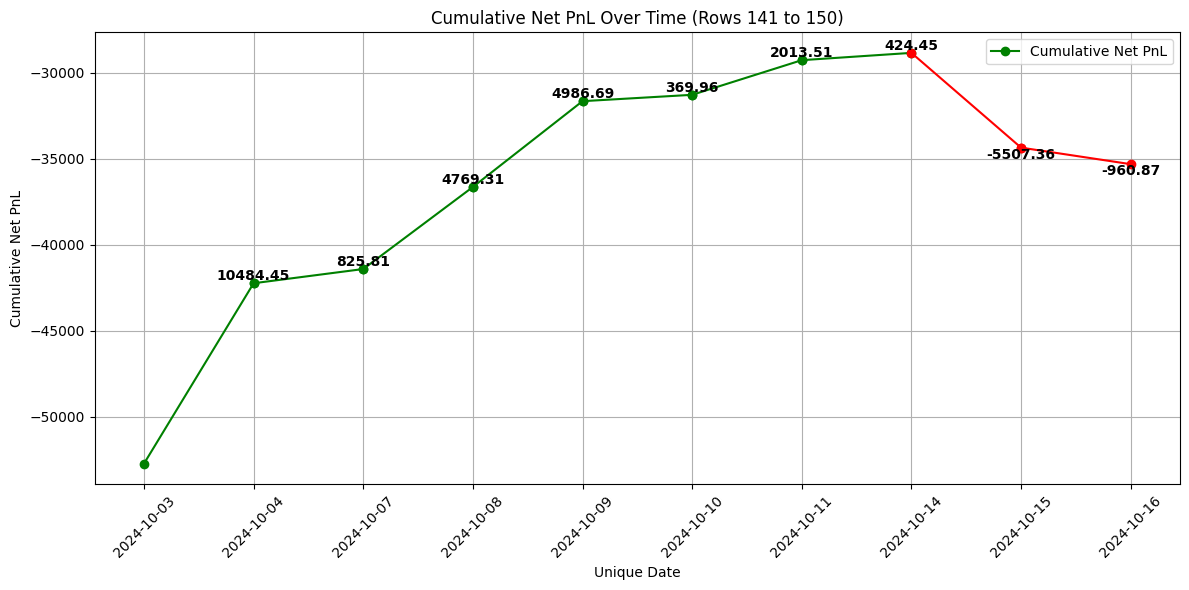

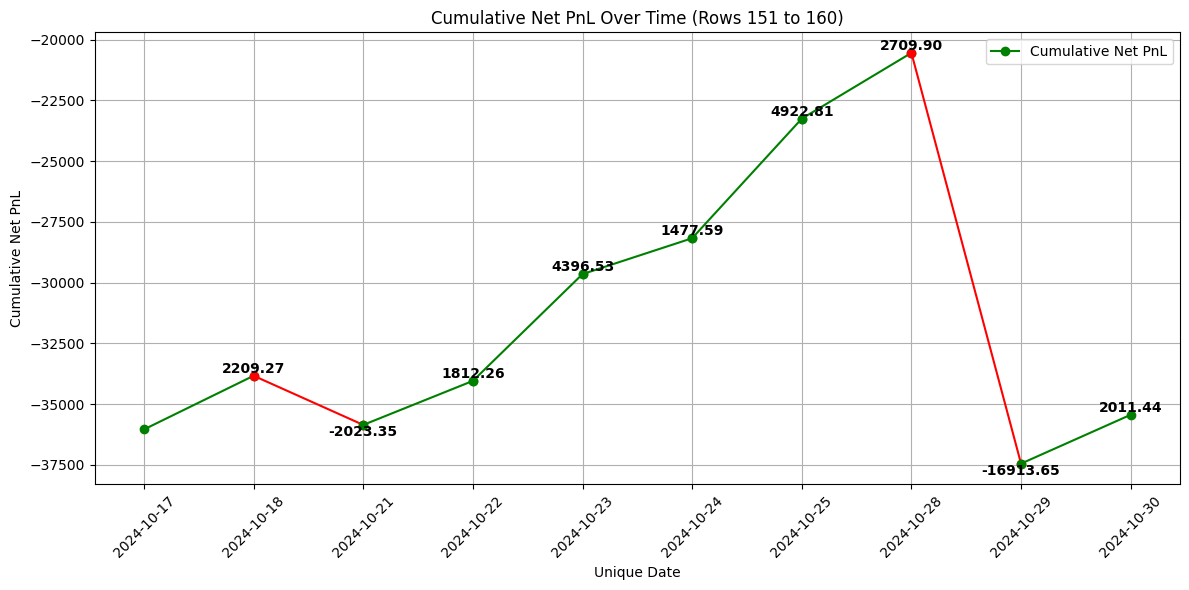

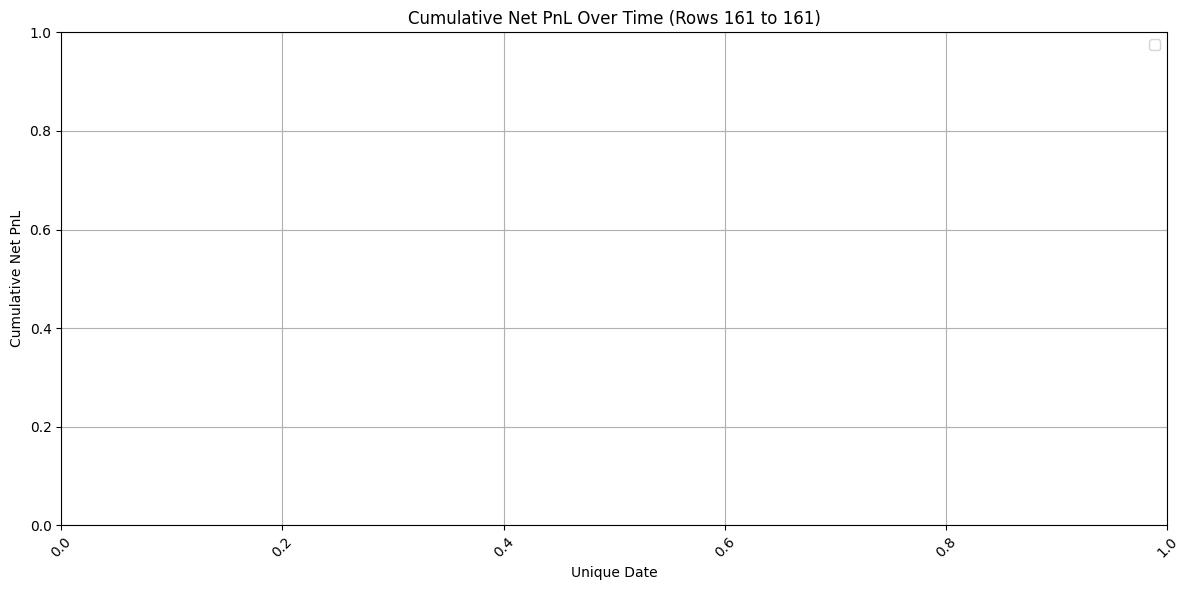

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming new_df_10 is already created and contains the necessary data
total_rows = len(new_df_10)
chunk_size = 10

# Loop through the DataFrame in chunks
for start in range(0, total_rows, chunk_size):
    end = start + chunk_size
    data_to_plot = new_df_10.iloc[start:end]

    plt.figure(figsize=(12, 6))

    # Calculate differences to determine the line color
    changes = np.sign(np.diff(data_to_plot['Cumulative Net PnL']))

    # Plot each segment with the appropriate color
    for i in range(len(changes)):
        color = 'green' if changes[i] > 0 else 'red'
        plt.plot(data_to_plot['Unique Date'].iloc[i:i+2],
                 data_to_plot['Cumulative Net PnL'].iloc[i:i+2],
                 marker='o', color=color)

    # Calculate differences from the last point to the next point
    differences = np.diff(data_to_plot['Cumulative Net PnL'])

    # Annotate each point with the difference from the last point
    for i in range(1, len(data_to_plot)):  # Start from 1 to access the previous point
        diff = differences[i - 1]
        annotation_y = data_to_plot['Cumulative Net PnL'].iloc[i] + (0.5 if diff > 0 else -0.5)  # Adjust position based on increase/decrease

        plt.text(data_to_plot['Unique Date'].iloc[i],
                 annotation_y,  # Adjusted position
                 f"{diff:.2f}",  # Display the difference
                 color='black', fontsize=10, fontweight='bold', ha='center', va='bottom' if diff > 0 else 'top')

    plt.title(f'Cumulative Net PnL Over Time (Rows {start + 1} to {min(end, total_rows)})')
    plt.xlabel('Unique Date')
    plt.ylabel('Cumulative Net PnL')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid()
    plt.legend(['Cumulative Net PnL'])
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()


# **My Trades with 10 % Stoploss for less then 200 buy price and 20 points stoploss for more then 200 buy price Analysis**

**Libraries**

In [35]:
df_10_200

Trade Date Order Time Trade Time              Security Name  Quantity  \
0     18/10/2023   10:19:36   10:19:36      NIFTY19OCT2023CE19600        50   
1     19/10/2023   10:17:18   10:17:45      NIFTY19OCT2023PE19700        50   
2     19/10/2023   10:59:30   11:03:18      NIFTY19OCT2023PE19700        50   
3     20/10/2023   10:31:13   10:31:13      NIFTY26OCT2023PE19700        50   
4     20/10/2023   11:38:08   11:38:29      NIFTY26OCT2023CE19300        50   
...          ...        ...        ...                        ...       ...   
1743  31/10/2024   10:26:02   10:26:02  BANKNIFTY06NOV2024CE52300        45   
1744  31/10/2024   10:52:19   10:52:19  BANKNIFTY06NOV2024PE51500        30   
1745  31/10/2024   12:08:52   12:10:58  BANKNIFTY06NOV2024CE52100        30   
1746  31/10/2024   12:21:49   12:21:49      NIFTY31OCT2024PE24250        25   
1747  31/10/2024   12:25:19   12:25:19      NIFTY31OCT2024PE24200       500   

      Buy rate  Sell rate  
0       238.75     234.55  
1       113.00      98.00  
2       120.00     105.05  
3       187.85     176.05  
4       274.00     256.15  
...        ...        ...  
1743    348.80     326.45  
1744    363.75     360.15  
1745    350.00     329.70  
1746     40.50      38.60  
1747     15.80      14.85  

[1748 rows x 7 columns]

In [36]:
# Calculate Buy Value, Sell Value, and PnL
df_10_200['Buy Value'] = df_10_200['Quantity'] * df_10_200['Buy rate']
df_10_200['Sell Value'] = df_10_200['Quantity'] * df_10_200['Sell rate']
df_10_200['PnL'] = df_10_200['Sell Value'] - df_10_200['Buy Value']

# Adjust Sell Value and PnL based on conditions
condition1 = df_10_200['Buy rate'] < 200
condition2 = df_10_200['Buy rate'] >= 200

# Apply 10% loss limit for Buy rate < 200
df_10_200.loc[condition1 & (df_10_200['PnL'] < -0.1 * df_10_200['Buy Value']), 'Sell Value'] = df_10_200['Buy Value'] * 0.90

# Apply 20-point loss limit for Buy rate >= 200
df_10_200.loc[condition2 & (df_10_200['Sell rate'] < df_10_200['Buy rate'] - 20), 'Sell Value'] = (df_10_200['Buy rate'] - 20) * df_10_200['Quantity']

# Recalculate PnL after adjustments
df_10_200['PnL'] = df_10_200['Sell Value'] - df_10_200['Buy Value']


In [37]:
# Calculate Charges for each transaction with 2 decimal places
df_10_200['Charges'] = round(
    brokerage +
    (transaction_charges_pct / 100) * (df_10_200['Buy Value'] + df_10_200['Sell Value']) +
    (stt_pct / 100) * df_10_200['Sell Value'] +
    (ipft_pct / 100) * (df_10_200['Buy Value'] + df_10_200['Sell Value']) +
    (stamp_duty_pct / 100) * (df_10_200['Buy Value'] + df_10_200['Sell Value']) +
    (sebi_charges_pct / 100) * (df_10_200['Buy Value'] + df_10_200['Sell Value']) +
    gst_pct * (
        brokerage +
        (transaction_charges_pct / 100) * (df_10_200['Buy Value'] + df_10_200['Sell Value']) +
        (stt_pct / 100) * df_10_200['Sell Value'] +
        (ipft_pct / 100) * (df_10_200['Buy Value'] + df_10_200['Sell Value']) +
        (stamp_duty_pct / 100) * (df_10_200['Buy Value'] + df_10_200['Sell Value']) +
        (sebi_charges_pct / 100) * (df_10_200['Buy Value'] + df_10_200['Sell Value'])
    ), 2
)

In [38]:
# Calculate Net PnL
df_10_200['Net PnL'] = df_10_200['PnL'] - df_10_200['Charges']  # Start by assuming PnL is positive

# Adjust Net PnL if PnL is negative
df_10_200.loc[df_10_200['PnL'] < 0, 'Net PnL'] = df_10_200['PnL'] + (-df_10_200['Charges'])

# Round Net PnL to 2 decimal places
df_10_200['Net PnL'] = df_10_200['Net PnL'].round(2)

In [39]:
# Calculate Cumulative Net PnL
df_10_200['Cumulative Net PnL'] = df_10_200['Net PnL'].cumsum()


In [40]:
import pandas as pd

df_10_200['Trade Date'] = pd.to_datetime(df_10_200['Trade Date'])

# Group by 'Trade Date' and sum the 'Net PnL' for each unique date
cumulative_net_pnl = df_10_200.groupby('Trade Date')['Net PnL'].sum().reset_index()

# Calculate the cumulative sum of Net PnL
cumulative_net_pnl['Cumulative Net PnL'] = cumulative_net_pnl['Net PnL'].cumsum()

# Rename the column to 'Unique Date'
cumulative_net_pnl.rename(columns={'Trade Date': 'Unique Date'}, inplace=True)

# Create new_df_10_200 with only the required columns
new_df_10_200 = cumulative_net_pnl[['Unique Date', 'Cumulative Net PnL']]

<ipython-input-40-067699f5ff69>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_10_200['Trade Date'] = pd.to_datetime(df_10_200['Trade Date'])


In [41]:
new_df_10_200

Unique Date  Cumulative Net PnL
0    2023-10-18             -234.64
1    2023-10-19            -1422.13
2    2023-10-20            -3720.70
3    2023-10-23             -334.05
4    2023-10-25            -1639.86
..          ...                 ...
156  2024-10-25            16481.33
157  2024-10-28            19232.57
158  2024-10-29             3251.74
159  2024-10-30             6316.92
160  2024-10-31             1291.43

[161 rows x 2 columns]

In [42]:
new_df_10_200['Unique Date'] = new_df_10_200['Unique Date'].astype(str)

<ipython-input-42-3545230c7f29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_10_200['Unique Date'] = new_df_10_200['Unique Date'].astype(str)


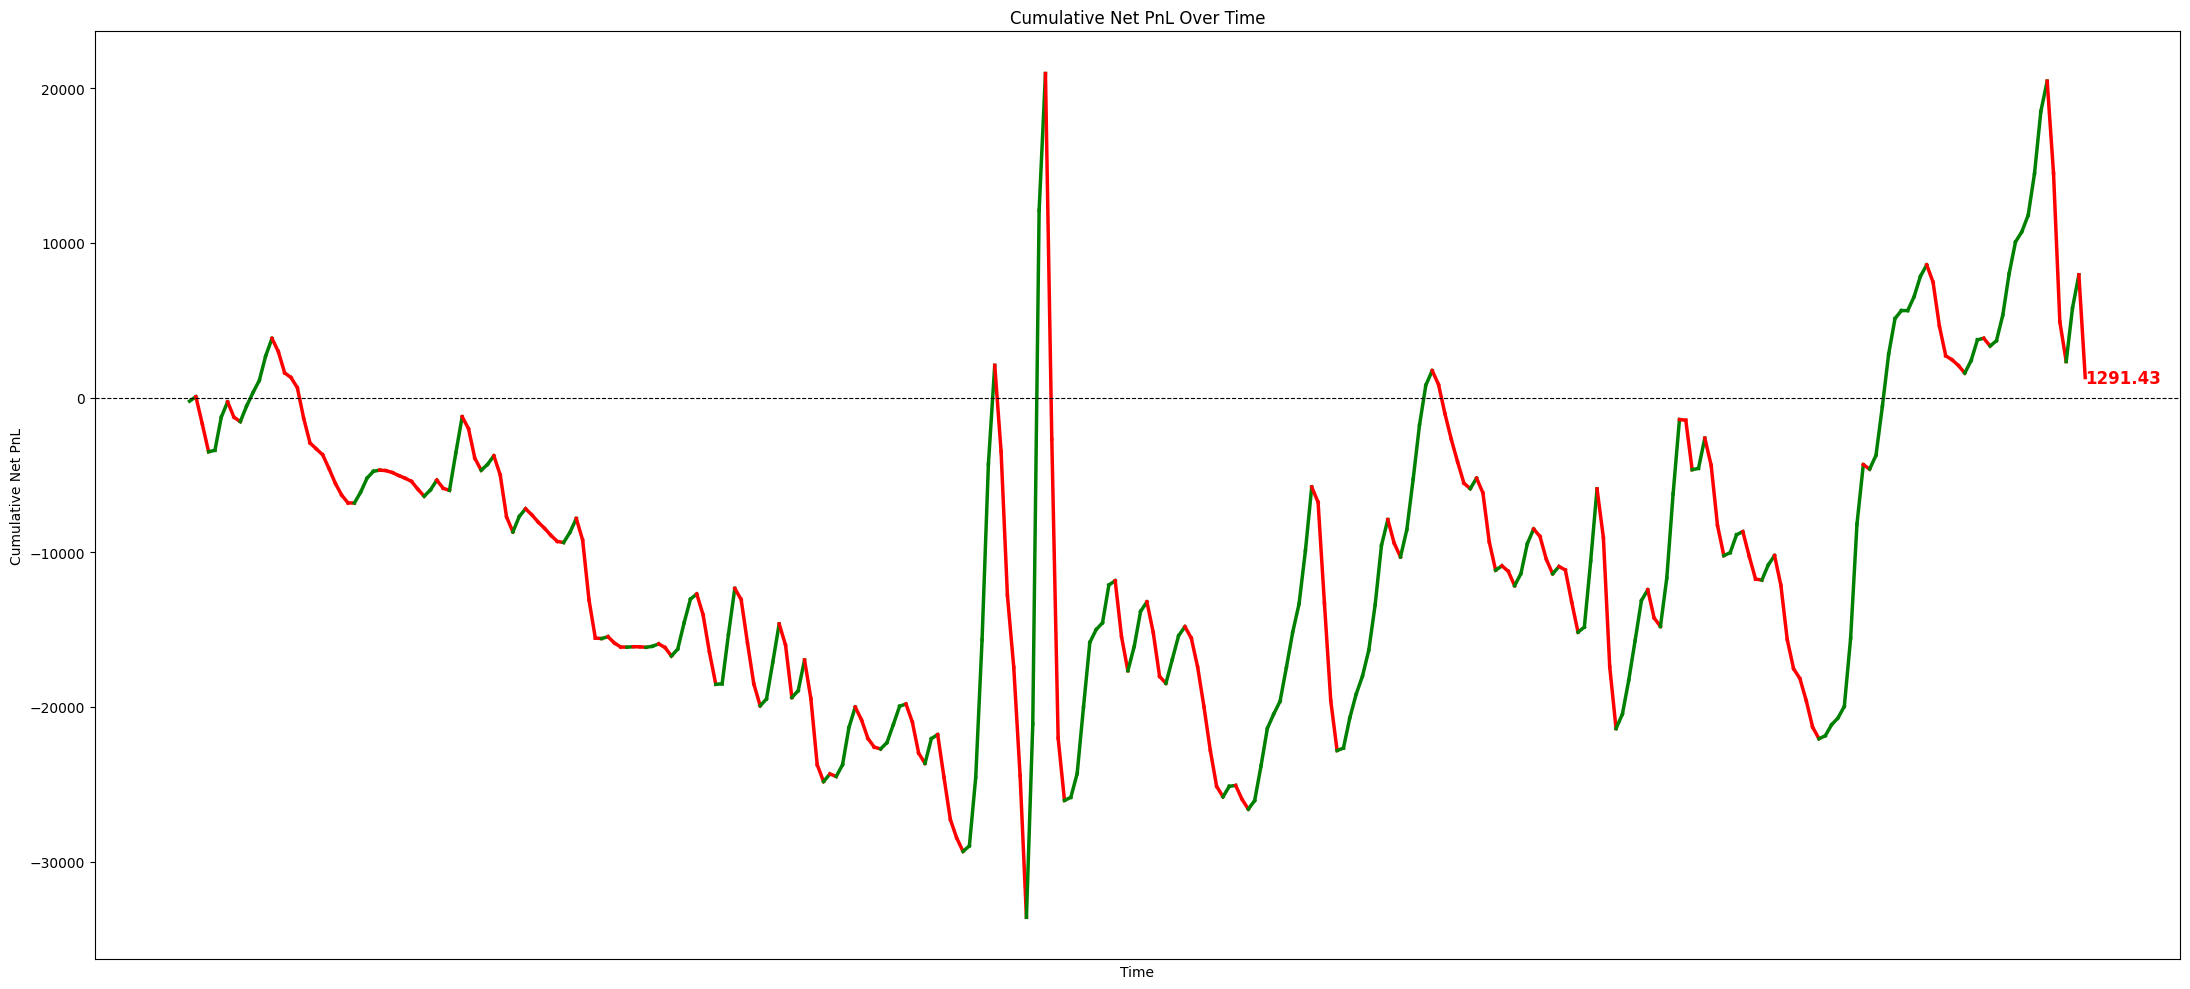

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Assuming new_df_10_200 is already created
x = new_df_10_200['Unique Date']
y = new_df_10_200['Cumulative Net PnL']

# Convert dates to numeric for interpolation
x_numeric = np.arange(len(x))
x_new = np.linspace(x_numeric.min(), x_numeric.max(), 300)  # 300 points for a smoother curve

# Apply cubic spline interpolation
spline = make_interp_spline(x_numeric, y, k=3)  # k=3 for cubic spline
y_smooth = spline(x_new)

# Plotting with dynamic colors based on the slope
plt.figure(figsize=(22, 10))

for i in range(1, len(x_new)):
    # Determine the color based on the slope (up = green, down = red)
    color = 'g' if y_smooth[i] > y_smooth[i - 1] else 'r'

    # Plot segment by segment with increased thickness
    plt.plot(x_new[i-1:i+1], y_smooth[i-1:i+1], color=color, linewidth=2.5)

# Draw a thin black horizontal line at y = 0
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')

# Add data label at the end of the line
end_x = x_new[-1]
end_y = y_smooth[-1]

# Determine the final color based on the trend at the last segment
end_color = 'g' if y_smooth[-1] > y_smooth[-2] else 'r'

plt.text(
    end_x, end_y, f'{end_y:.2f}',
    color=end_color, fontweight='bold', fontsize=12,
    va='center', ha='left'  # Align label to the left of the end point
)

plt.title('Cumulative Net PnL Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Net PnL')

# Remove or simplify x-axis ticks
plt.xticks([])  # No x-axis labels

plt.tight_layout()  # Adjust layout for better fit
plt.show()

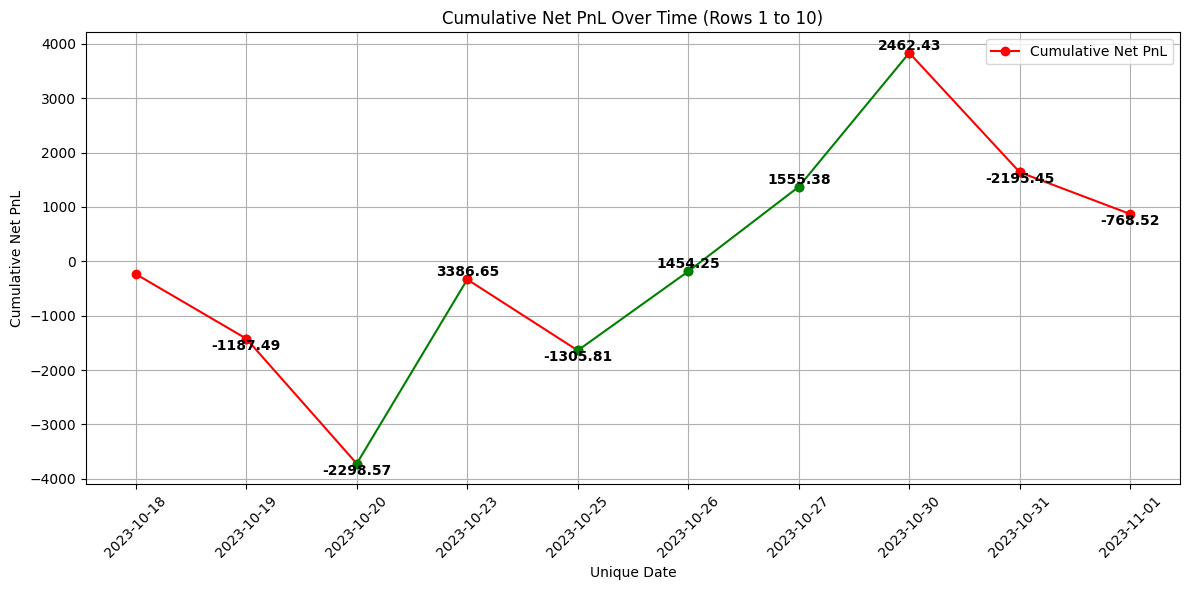

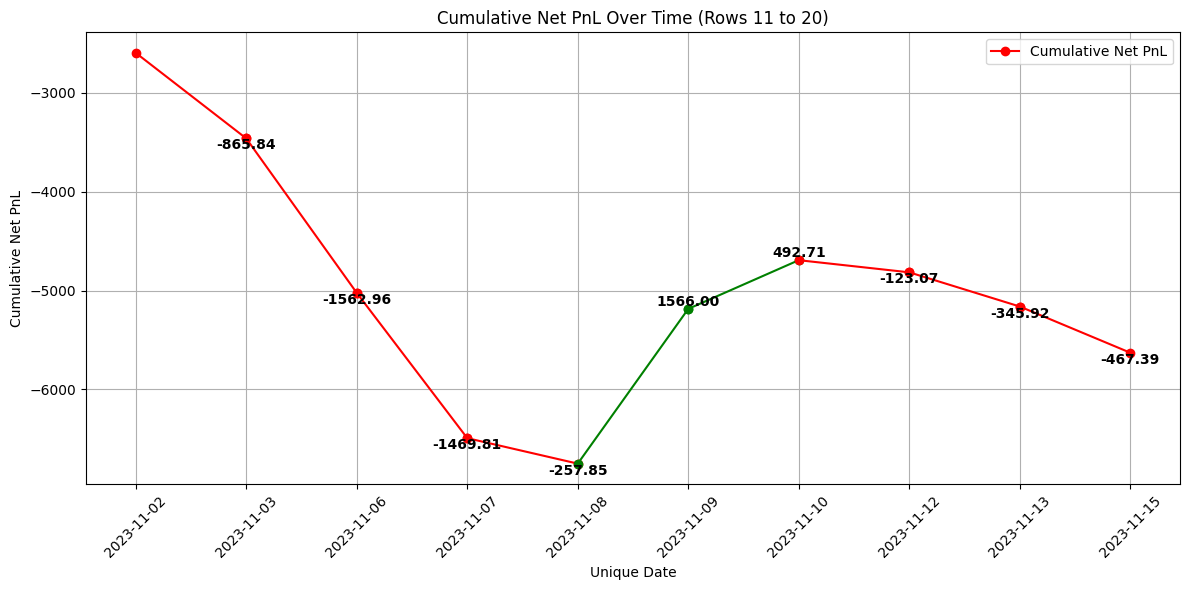

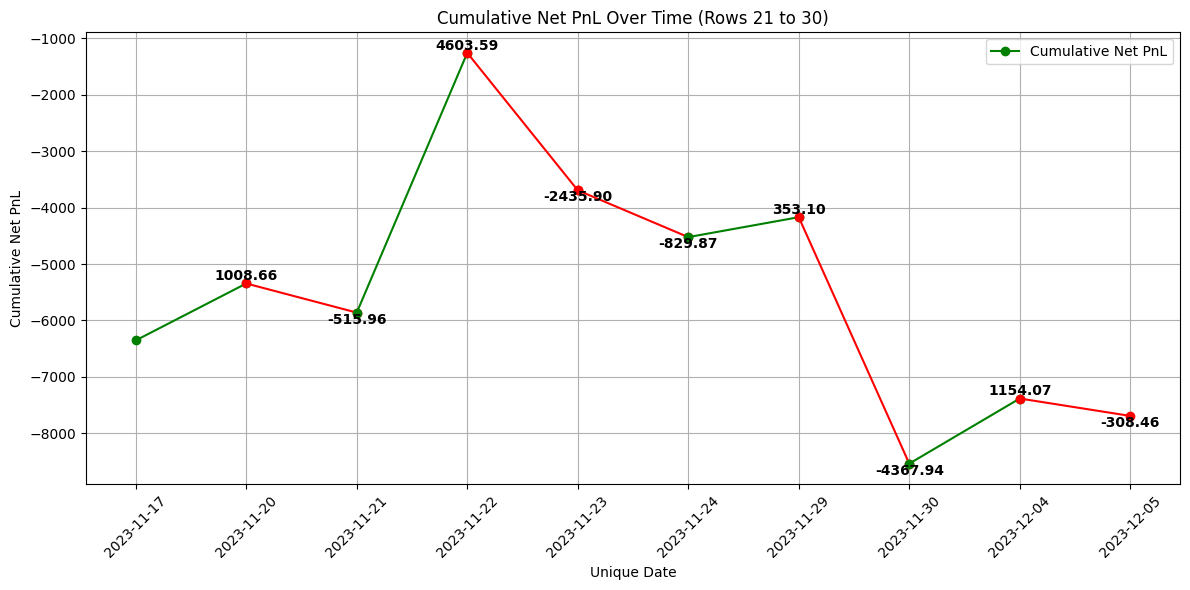

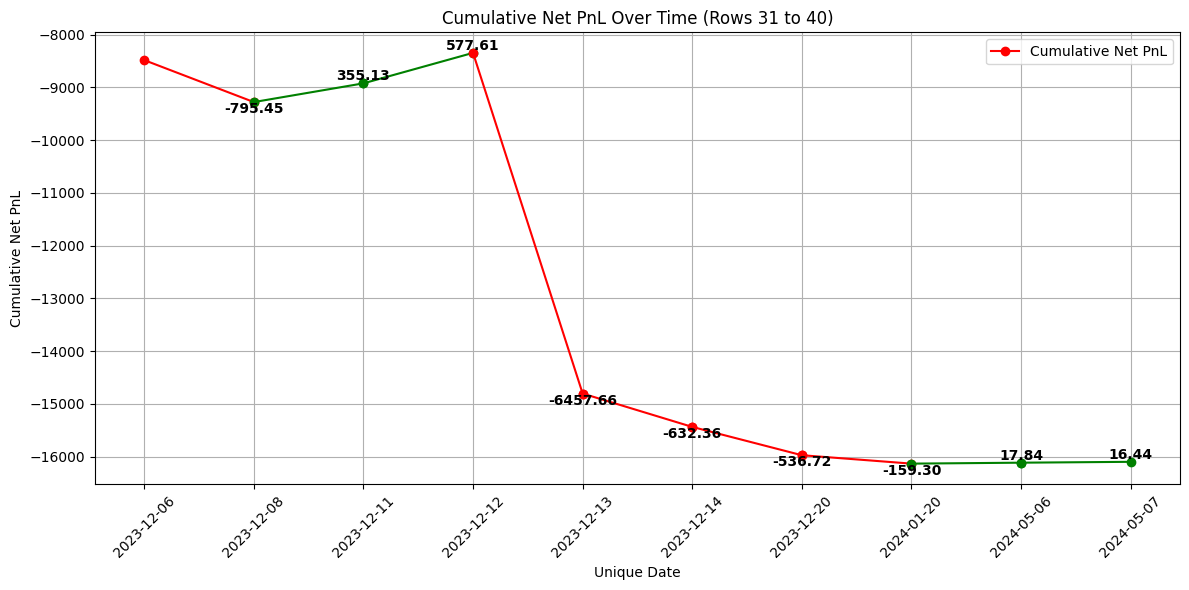

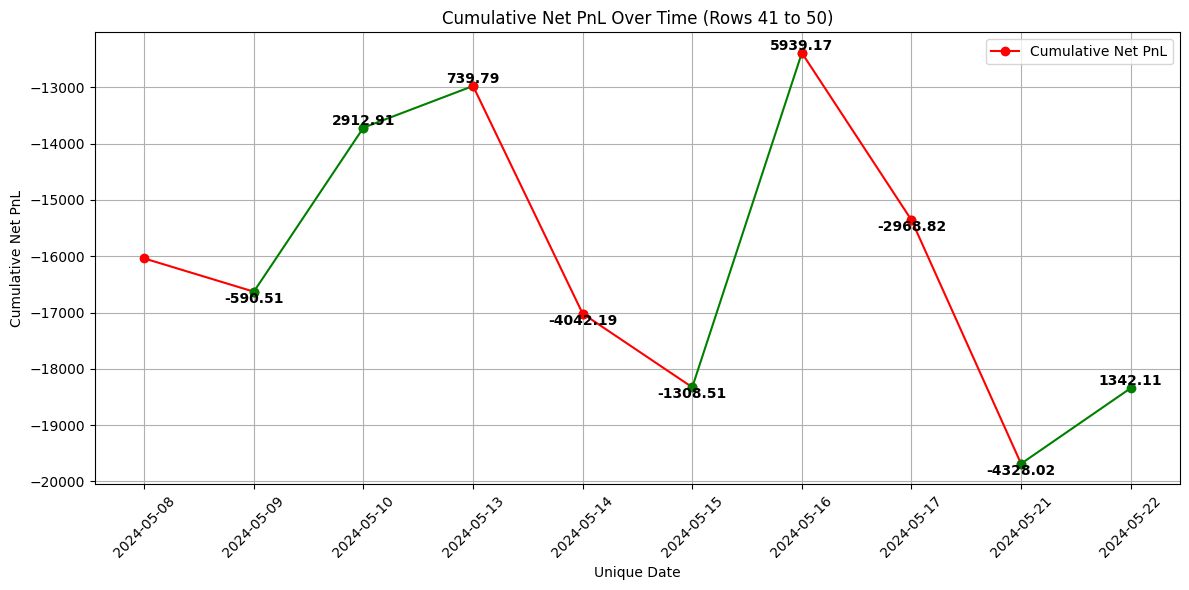

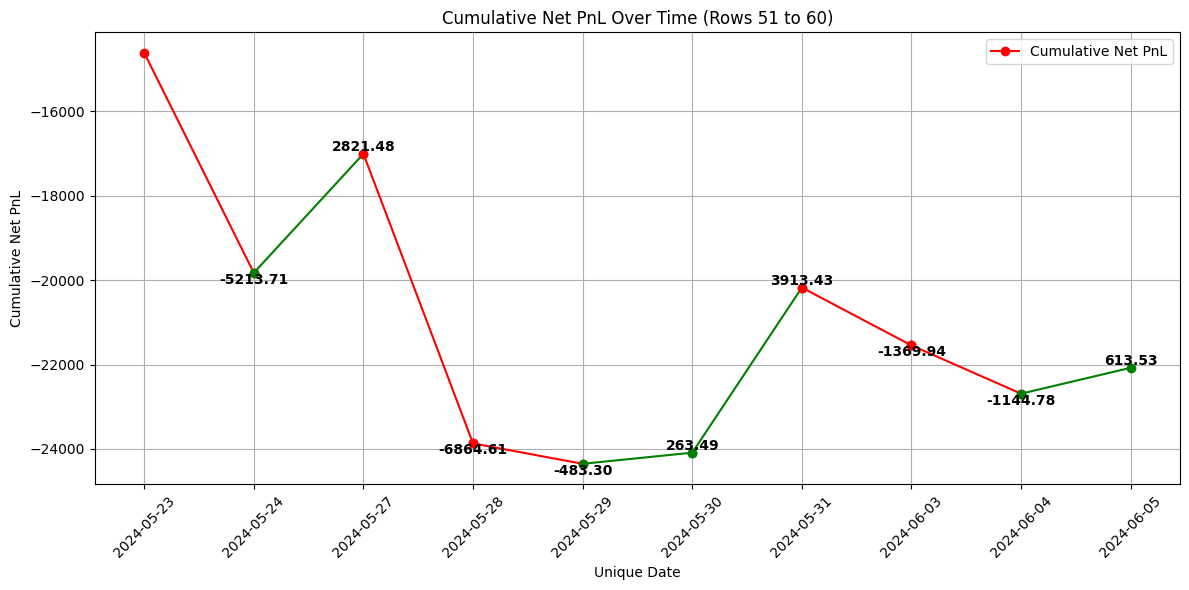

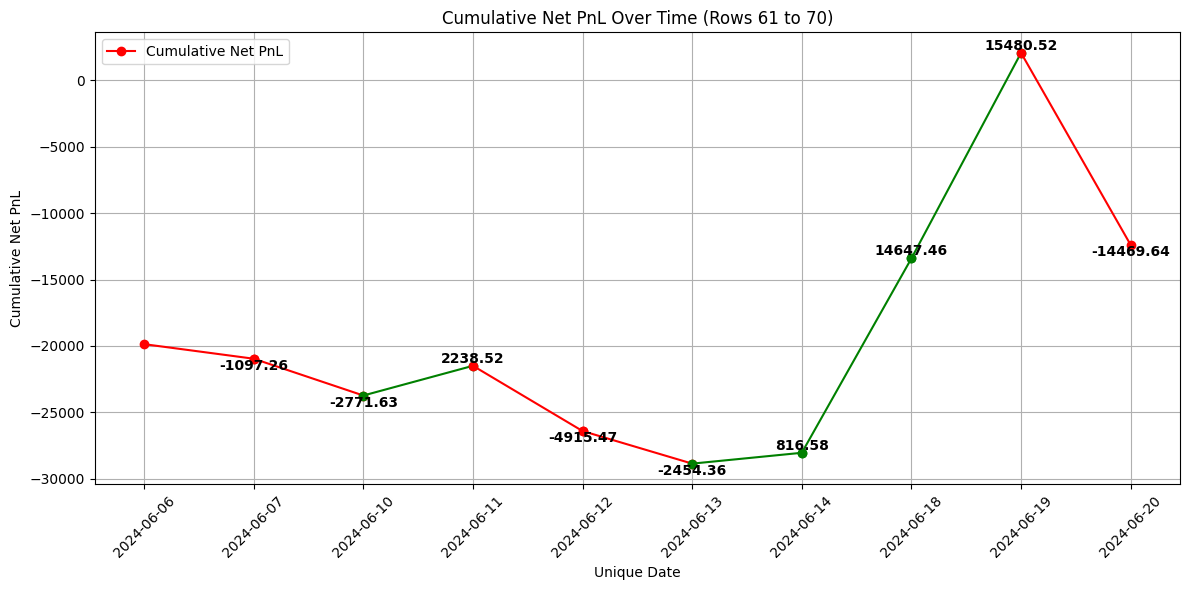

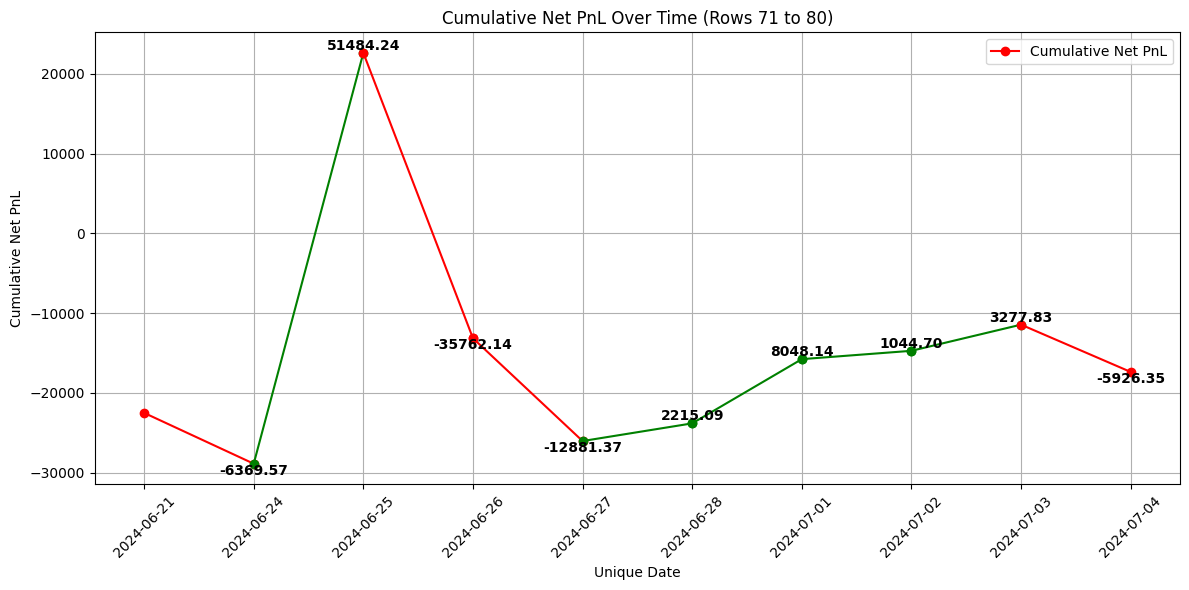

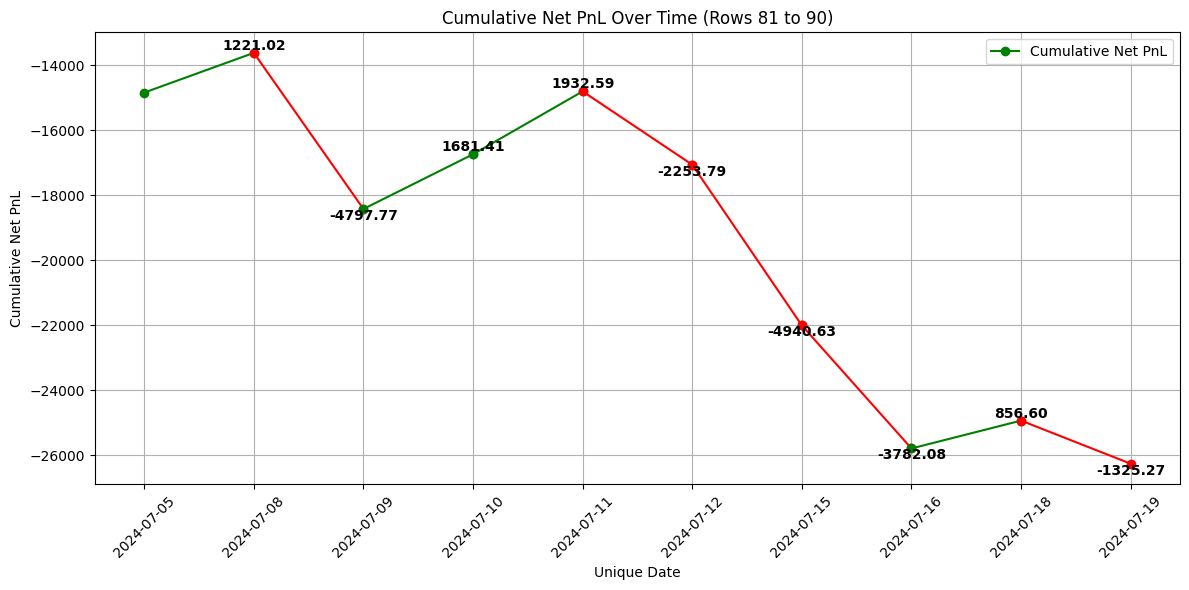

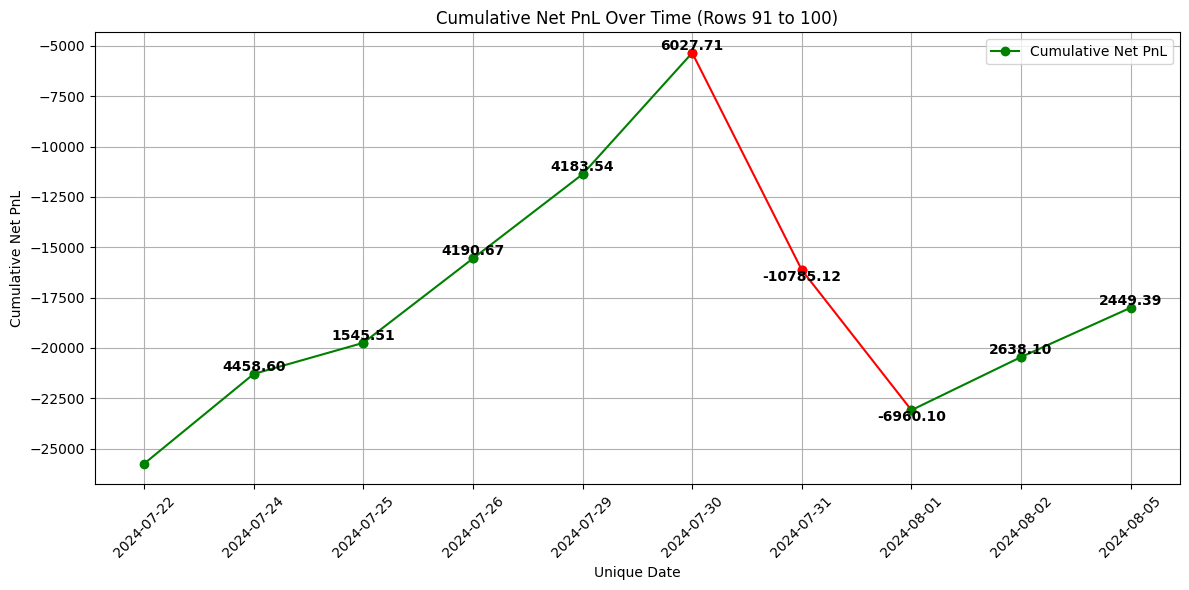

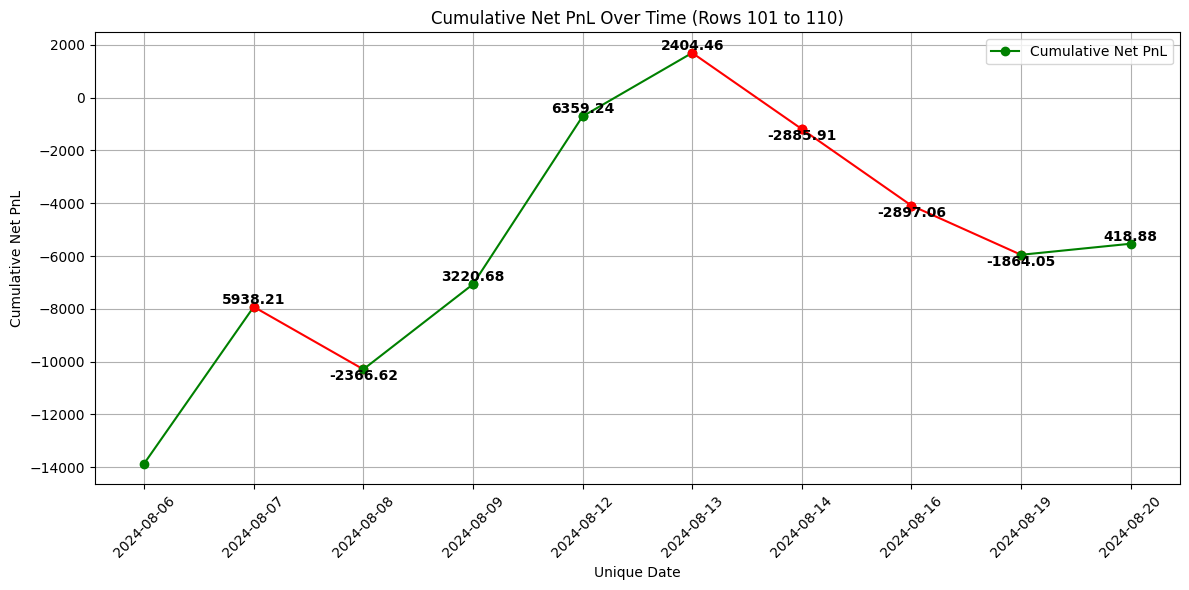

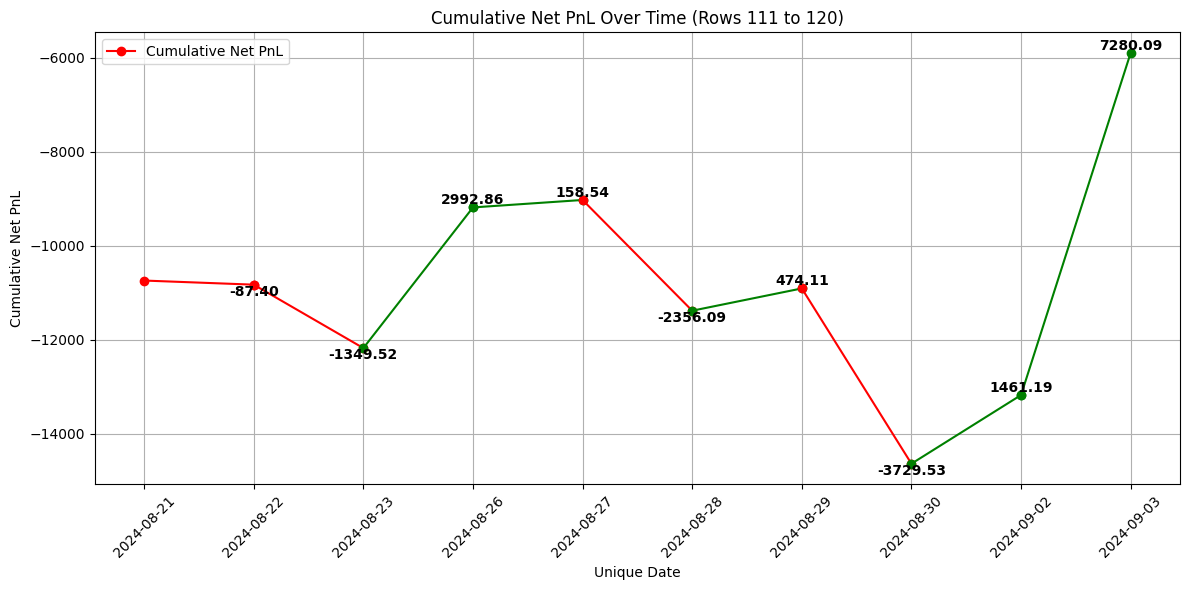

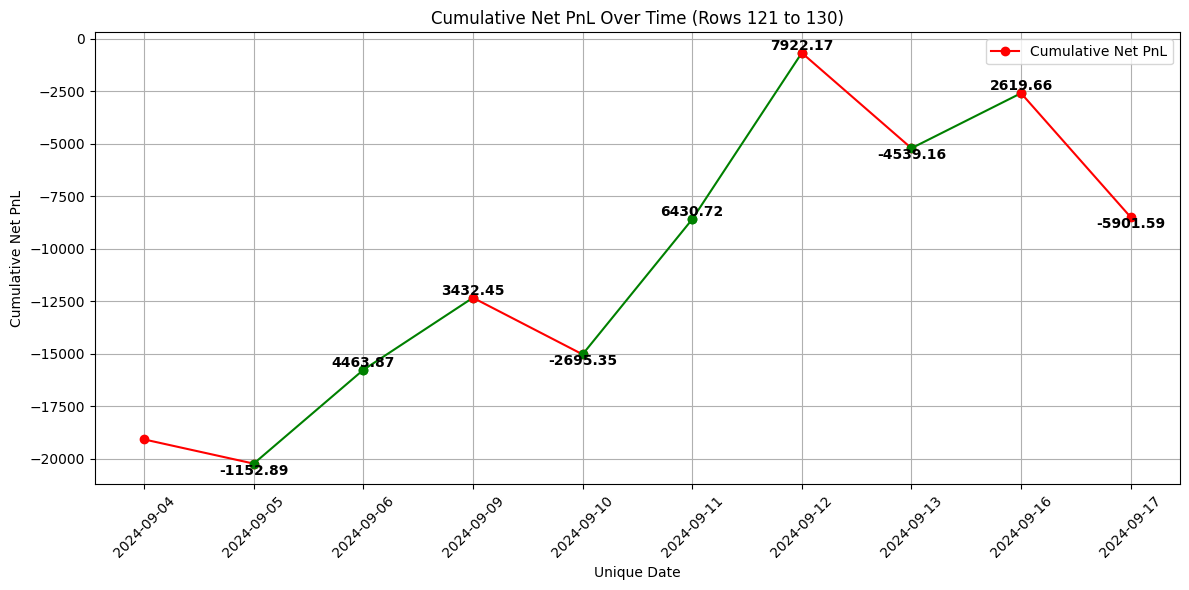

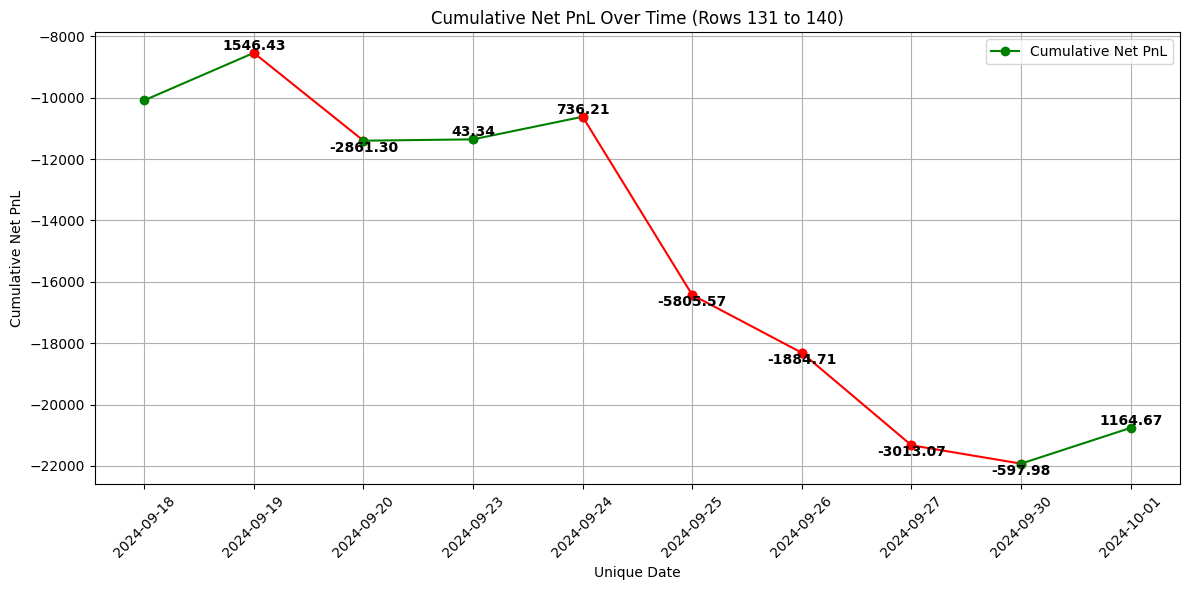

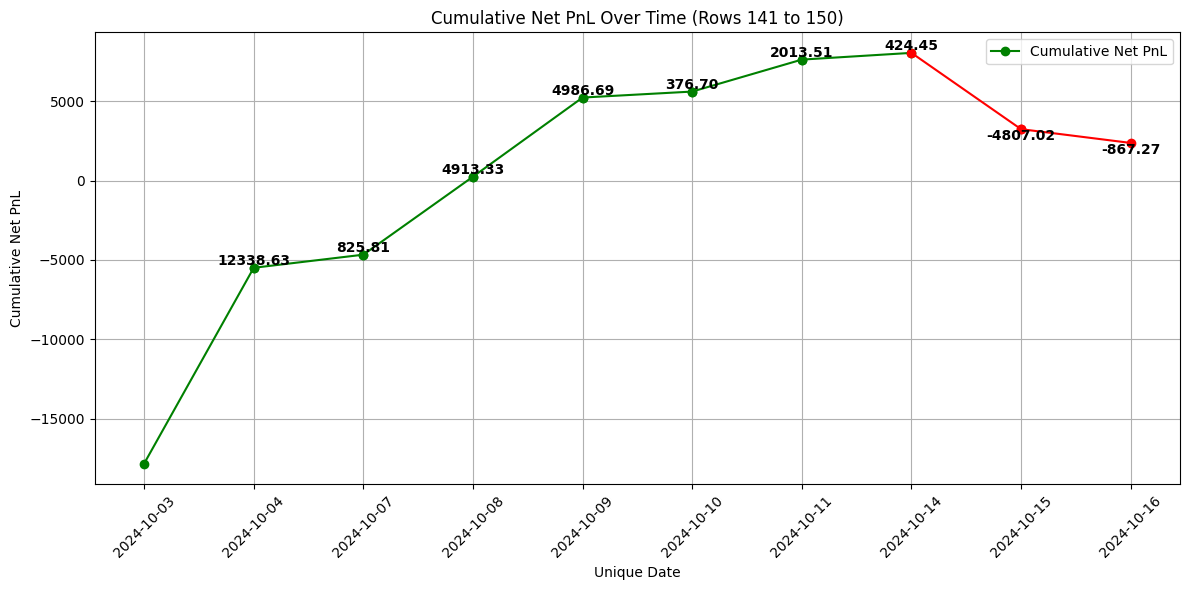

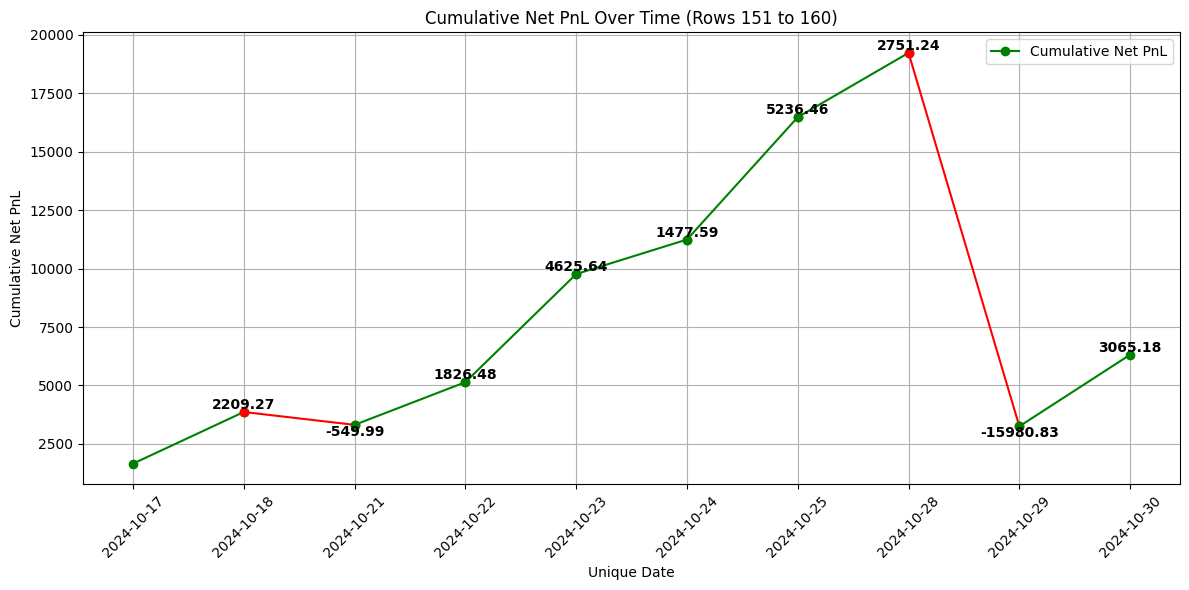

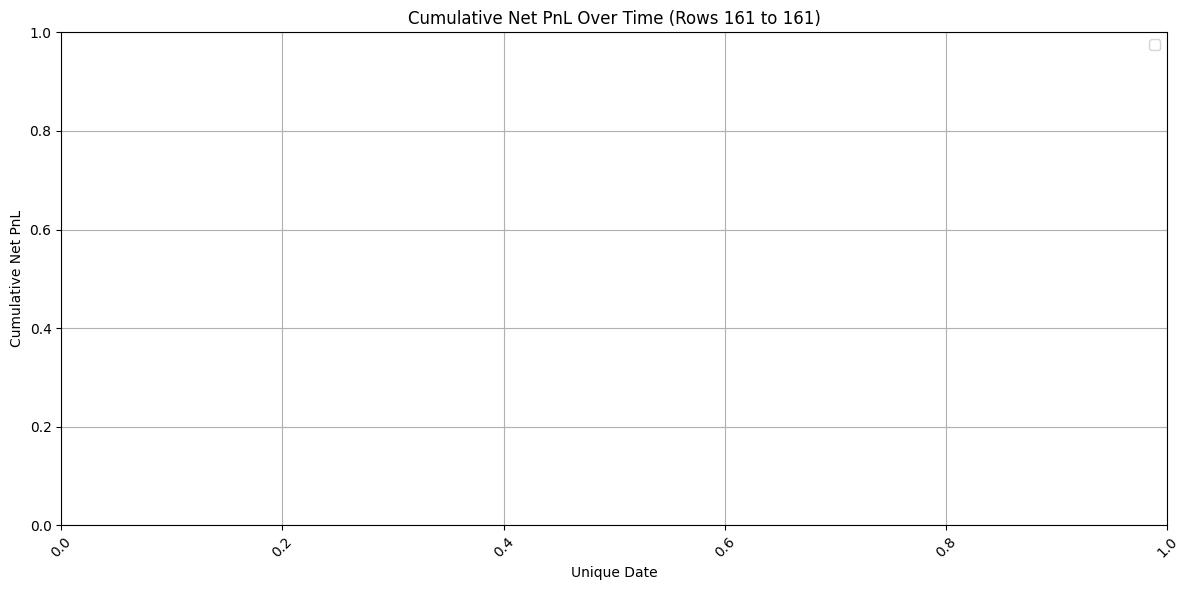

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming new_df_10_200 is already created and contains the necessary data
total_rows = len(new_df_10_200)
chunk_size = 10

# Loop through the DataFrame in chunks of 10 rows
for start in range(0, total_rows, chunk_size):
    end = start + chunk_size
    data_to_plot = new_df_10_200.iloc[start:end]

    plt.figure(figsize=(12, 6))

    # Calculate differences to determine the line color
    changes = np.sign(np.diff(data_to_plot['Cumulative Net PnL']))

    # Plot each segment with the appropriate color
    for i in range(len(changes)):
        color = 'green' if changes[i] > 0 else 'red'
        plt.plot(data_to_plot['Unique Date'].iloc[i:i+2],
                 data_to_plot['Cumulative Net PnL'].iloc[i:i+2],
                 marker='o', color=color)

    # Calculate differences from the last point to the next point
    differences = np.diff(data_to_plot['Cumulative Net PnL'])

    # Annotate each point with the difference from the last point
    for i in range(1, len(data_to_plot)):  # Start from 1 to access the previous point
        diff = differences[i - 1]
        annotation_y = data_to_plot['Cumulative Net PnL'].iloc[i] + (0.5 if diff > 0 else -0.5)  # Adjust position based on increase/decrease

        plt.text(data_to_plot['Unique Date'].iloc[i],
                 annotation_y,  # Adjusted position
                 f"{diff:.2f}",  # Display the difference
                 color='black', fontsize=10, fontweight='bold', ha='center', va='bottom' if diff > 0 else 'top')

    plt.title(f'Cumulative Net PnL Over Time (Rows {start + 1} to {min(end, total_rows)})')
    plt.xlabel('Unique Date')
    plt.ylabel('Cumulative Net PnL')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid()
    plt.legend(['Cumulative Net PnL'])
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()

# ***ALL YOU NEED IS HERE***

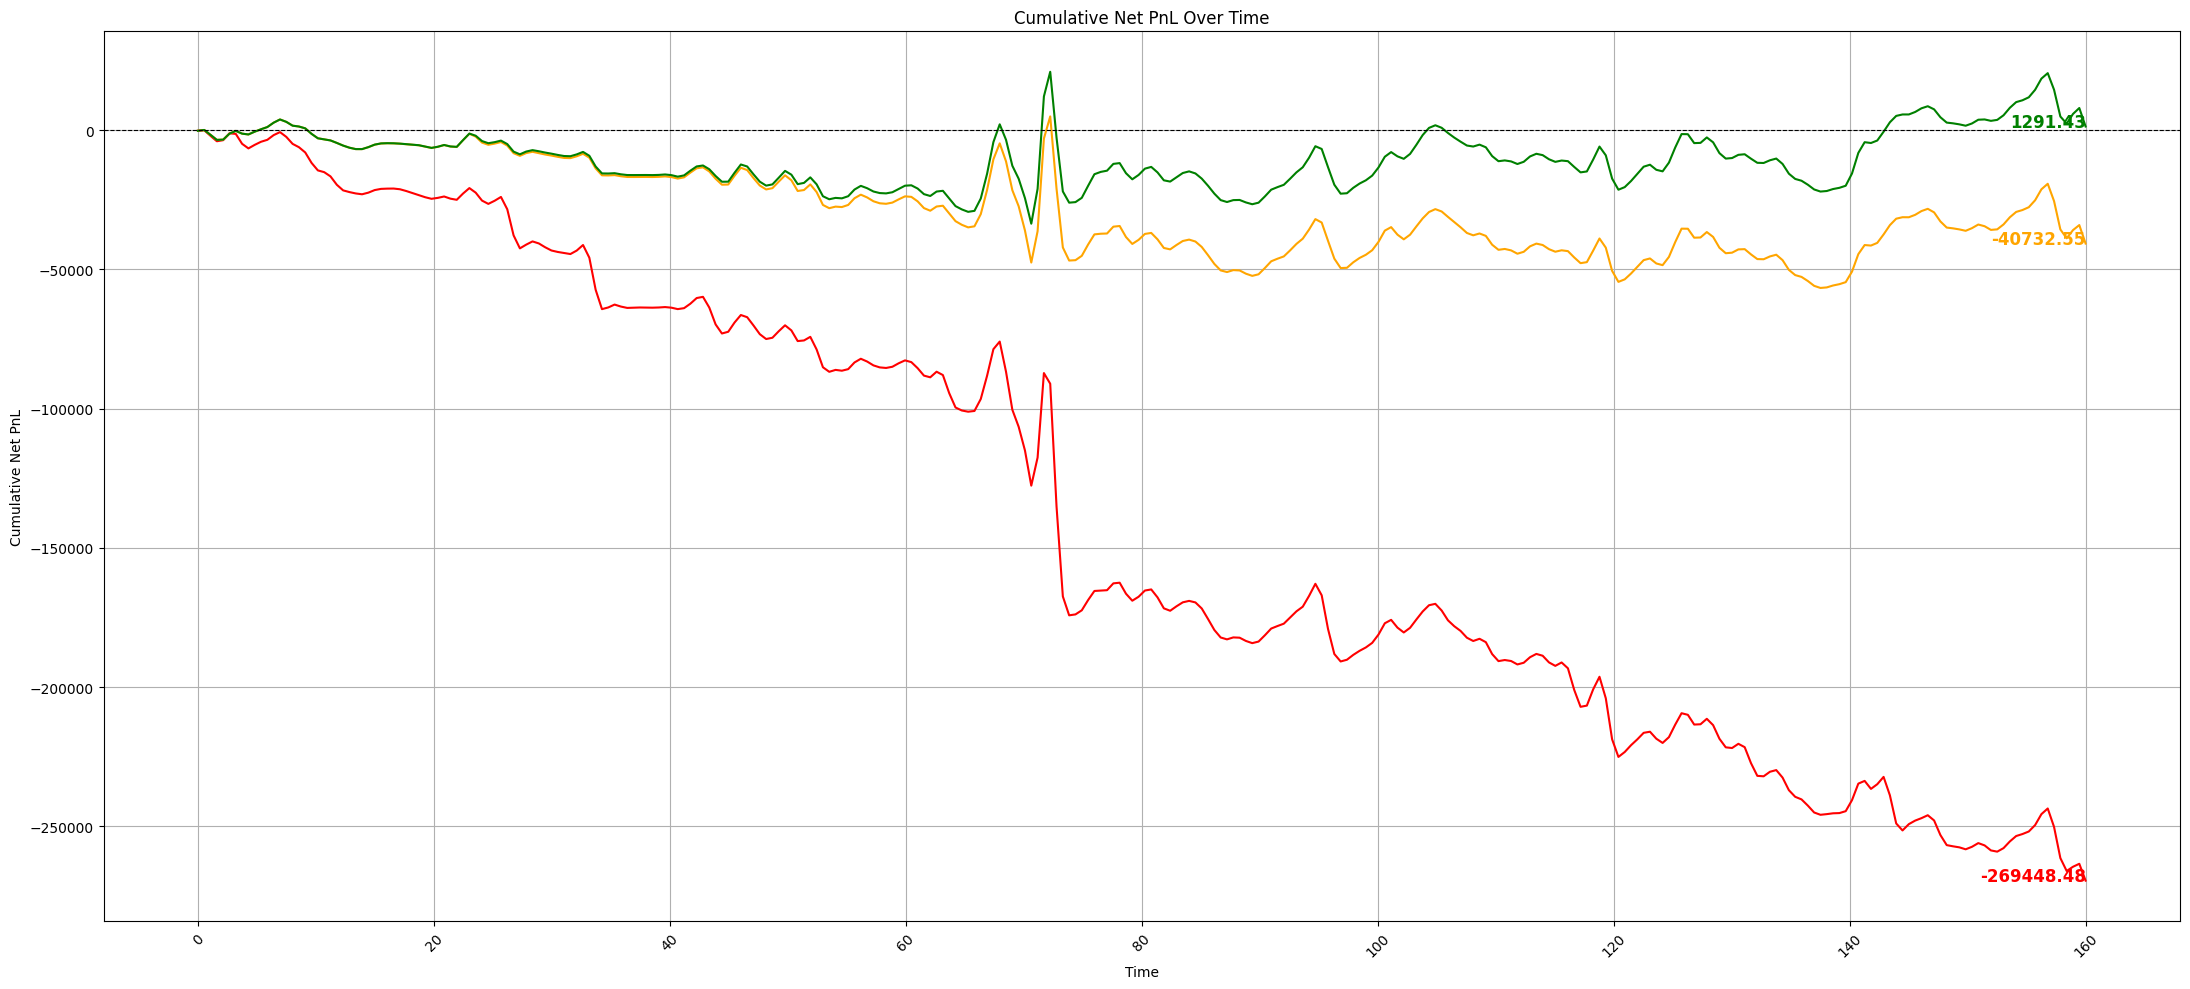

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Assuming new_df_m, new_df_10, and new_df_10_200 are already created
# Create a new figure
plt.figure(figsize=(22, 10))

# Code 1: Plot for new_df_m (Red line)
x_m = new_df_m['Unique Date']
y_m = new_df_m['Cumulative Net PnL']
x_numeric_m = np.arange(len(x_m))
x_new_m = np.linspace(x_numeric_m.min(), x_numeric_m.max(), 300)
spline_m = make_interp_spline(x_numeric_m, y_m, k=3)
y_smooth_m = spline_m(x_new_m)
plt.plot(x_new_m, y_smooth_m, color='red')  # Removed the label for the line
# Add final value annotation
plt.text(x_new_m[-1], y_smooth_m[-1], f"{y_smooth_m[-1]:.2f}", color='red', fontsize=12, fontweight='bold', ha='right')

# Code 2: Plot for new_df_10 (Orange line)
x_10 = new_df_10['Unique Date']
y_10 = new_df_10['Cumulative Net PnL']
x_numeric_10 = np.arange(len(x_10))
x_new_10 = np.linspace(x_numeric_10.min(), x_numeric_10.max(), 300)
spline_10 = make_interp_spline(x_numeric_10, y_10, k=3)
y_smooth_10 = spline_10(x_new_10)
plt.plot(x_new_10, y_smooth_10, color='orange')  # Removed the label for the line
# Add final value annotation
plt.text(x_new_10[-1], y_smooth_10[-1], f"{y_smooth_10[-1]:.2f}", color='orange', fontsize=12, fontweight='bold', ha='right')

# Code 3: Plot for new_df_10_200 (Green line)
x_10_200 = new_df_10_200['Unique Date']
y_10_200 = new_df_10_200['Cumulative Net PnL']
x_numeric_10_200 = np.arange(len(x_10_200))
x_new_10_200 = np.linspace(x_numeric_10_200.min(), x_numeric_10_200.max(), 300)
spline_10_200 = make_interp_spline(x_numeric_10_200, y_10_200, k=3)
y_smooth_10_200 = spline_10_200(x_new_10_200)
plt.plot(x_new_10_200, y_smooth_10_200, color='green')  # Removed the label for the line
# Add final value annotation
plt.text(x_new_10_200[-1], y_smooth_10_200[-1], f"{y_smooth_10_200[-1]:.2f}", color='green', fontsize=12, fontweight='bold', ha='right')

# Title and labels
plt.title('Cumulative Net PnL Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Net PnL')
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at y=0
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.legend()  # Removed the legend line
plt.grid()
plt.tight_layout()  # Adjust layout for better fit
plt.show()

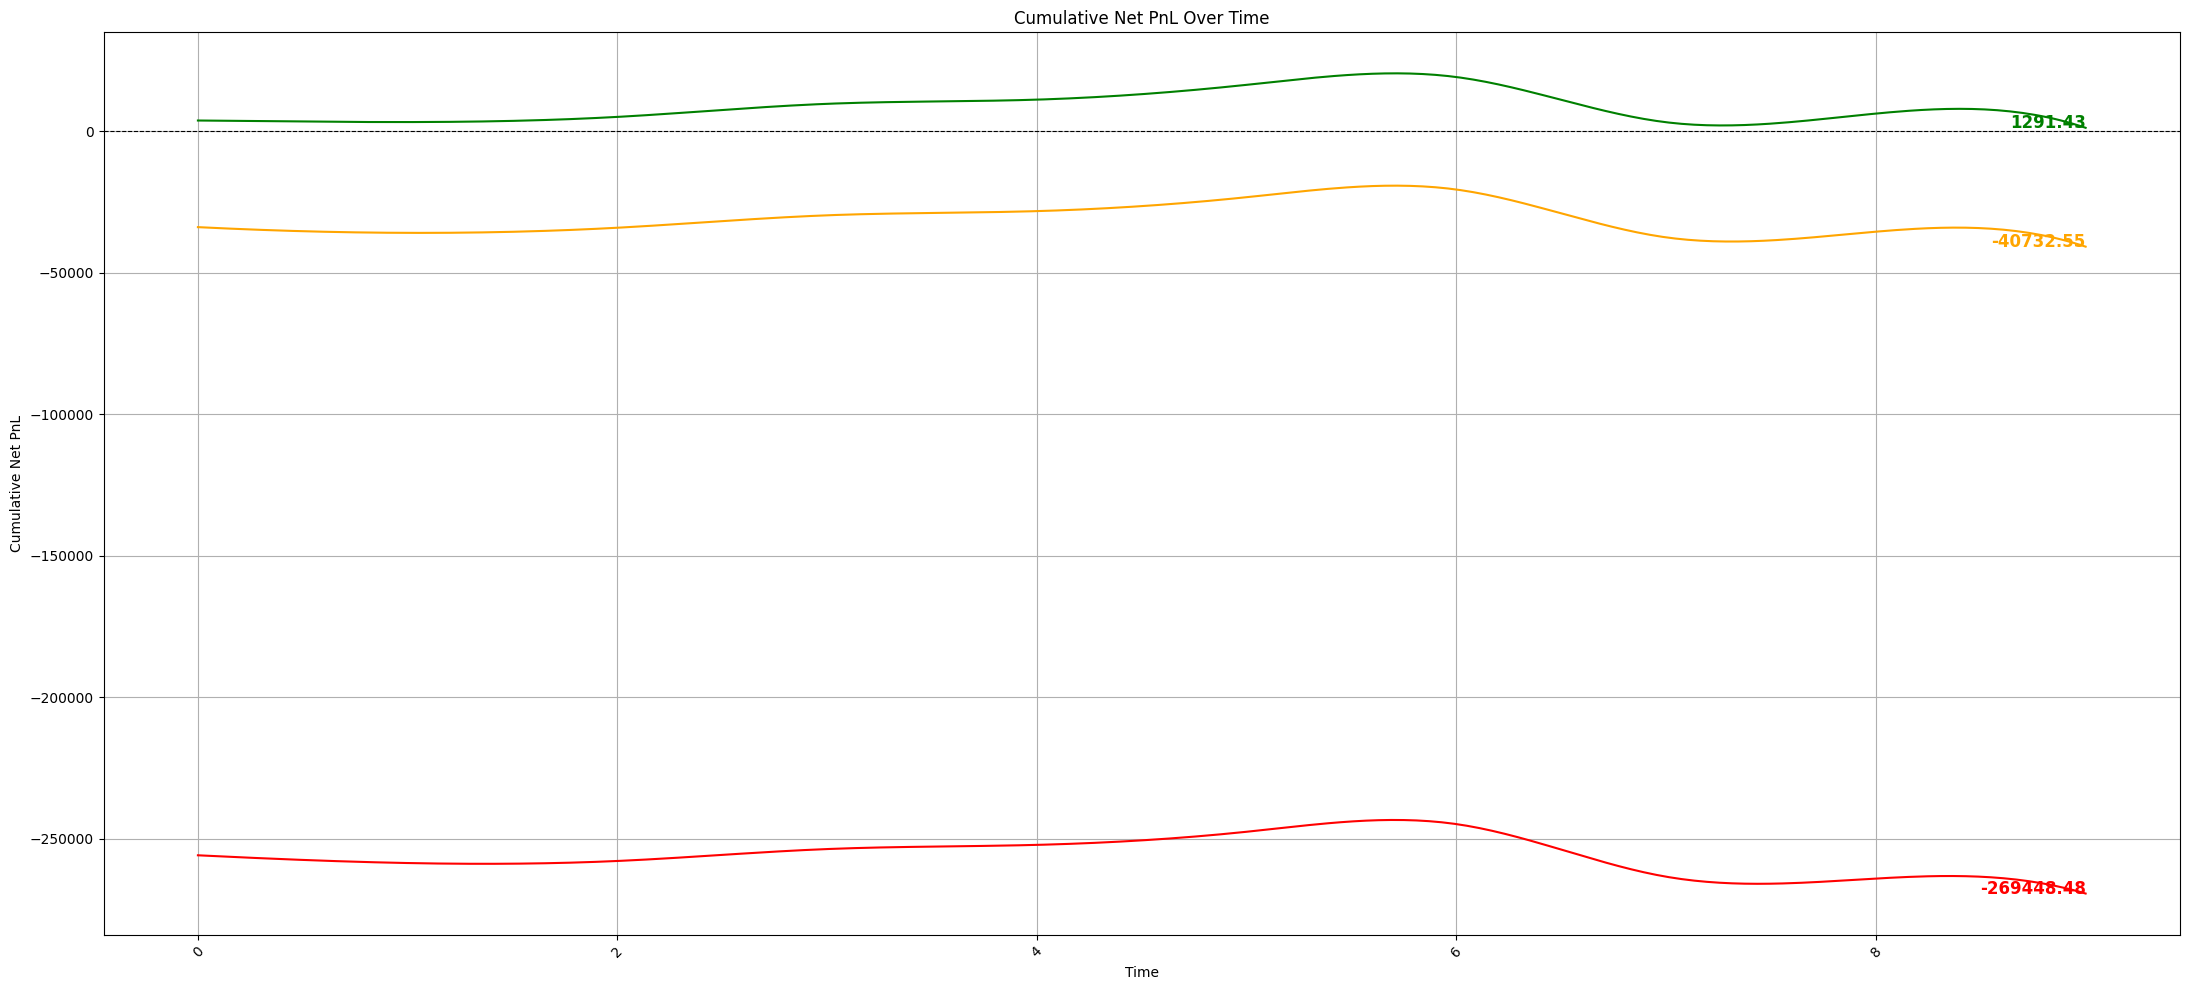

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Create a new figure
plt.figure(figsize=(22, 10))

# Function to plot the last 5 points with interpolation
def plot_last_5_points(x, y, color):
    # Use only the last 5 data points
    x_last = x[-10:]
    y_last = y[-10:]

    # Convert the last 5 dates to numeric
    x_numeric_last = np.arange(len(x_last))

    # Interpolate for smoother curves
    x_new_last = np.linspace(x_numeric_last.min(), x_numeric_last.max(), 300)
    spline = make_interp_spline(x_numeric_last, y_last, k=3)
    y_smooth_last = spline(x_new_last)

    # Plot the smooth curve
    plt.plot(x_new_last, y_smooth_last, color=color)

    # Add annotation for the final value
    plt.text(
        x_new_last[-1], y_smooth_last[-1],
        f"{y_smooth_last[-1]:.2f}",
        color=color, fontsize=12, fontweight='bold', ha='right'
    )

# Plot for new_df_m (Red line)
plot_last_5_points(new_df_m['Unique Date'], new_df_m['Cumulative Net PnL'], 'red')

# Plot for new_df_10 (Orange line)
plot_last_5_points(new_df_10['Unique Date'], new_df_10['Cumulative Net PnL'], 'orange')

# Plot for new_df_10_200 (Green line)
plot_last_5_points(new_df_10_200['Unique Date'], new_df_10_200['Cumulative Net PnL'], 'green')

# Title and labels
plt.title('Cumulative Net PnL Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Net PnL')
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at y=0
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and show plot
plt.grid()
plt.tight_layout()
plt.show()